![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

In [0]:
from johnsnowlabs import nlp, medical

In [0]:
import sparknlp
import sparknlp_jsl
from sparknlp.base import *
from sparknlp.annotator import *
from sparknlp_jsl.annotator import *

import pyspark.sql.types as T
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline,PipelineModel

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_colwidth', 100)
pd.set_option('display.max_columns', 100)  
pd.set_option('display.expand_frame_repr', False)

spark

## Healthcare NLP for Data Scientists Course

If you are not familiar with the components in this notebook, you can check [Healthcare NLP for Data Scientists Udemy Course](https://www.udemy.com/course/healthcare-nlp-for-data-scientists/) and the [MOOC Notebooks](https://github.com/JohnSnowLabs/spark-nlp-workshop/tree/master/Spark_NLP_Udemy_MOOC/Healthcare_NLP) for each components.

## Pretrained Relation Extraction Models and Pipelines

Here are the list of pretrained Relation Extraction models and pipelines:

*  **Relation Extraction Models**

|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [generic_re](https://nlp.johnsnowlabs.com/2022/12/20/generic_re.html)  | 2| [posology_re](https://nlp.johnsnowlabs.com/2020/09/01/posology_re.html)  | 3| [re_ade_biobert](https://nlp.johnsnowlabs.com/2021/07/16/re_ade_biobert_en.html)  |
| 4| [re_ade_clinical](https://nlp.johnsnowlabs.com/2021/07/12/re_ade_clinical_en.html)  | 5| [re_ade_conversational](https://nlp.johnsnowlabs.com/2022/07/27/re_ade_conversational_en_3_0.html)  | 6| [re_bodypart_directions](https://nlp.johnsnowlabs.com/2021/01/18/re_bodypart_directions_en.html)  |
| 7| [re_bodypart_problem](https://nlp.johnsnowlabs.com/2021/01/18/re_bodypart_problem_en.html)  | 8| [re_bodypart_proceduretest](https://nlp.johnsnowlabs.com/2021/01/18/re_bodypart_proceduretest_en.html)  | 9| [re_clinical](https://nlp.johnsnowlabs.com/2020/09/24/re_clinical_en.html)  |
| 10| [re_date_clinical](https://nlp.johnsnowlabs.com/2021/01/18/re_date_clinical_en.html)  | 11| [re_drug_drug_interaction_clinical](https://nlp.johnsnowlabs.com/2020/09/03/re_drug_drug_interaction_clinical_en.html)  | 12| [re_drugprot_clinical](https://nlp.johnsnowlabs.com/2022/01/05/re_drugprot_clinical_en.html)  |
| 13| [re_human_phenotype_gene_clinical](https://nlp.johnsnowlabs.com/2020/09/30/re_human_phenotype_gene_clinical_en.html)  | 14| [re_oncology_biomarker_result_wip](https://nlp.johnsnowlabs.com/2022/09/27/re_oncology_biomarker_result_wip_en.html)  | 15| [re_oncology_granular_wip](https://nlp.johnsnowlabs.com/2022/09/27/re_oncology_granular_wip_en.html)  |
| 16| [re_oncology_location_wip](https://nlp.johnsnowlabs.com/2022/09/27/re_oncology_location_wip_en.html)  | 17| [re_oncology_size_wip](https://nlp.johnsnowlabs.com/2022/09/26/re_oncology_size_wip_en.html)  | 18| [re_oncology_temporal_wip](https://nlp.johnsnowlabs.com/2022/09/27/re_oncology_temporal_wip_en.html)  |
| 19| [re_oncology_test_result_wip](https://nlp.johnsnowlabs.com/2022/09/27/re_oncology_test_result_wip_en.html)  | 20| [re_oncology_wip](https://nlp.johnsnowlabs.com/2022/09/27/re_oncology_wip_en.html)  | 21| [re_temporal_events_clinical](https://nlp.johnsnowlabs.com/2020/09/28/re_temporal_events_clinical_en.html)  |
| 22| [re_temporal_events_enriched_clinical](https://nlp.johnsnowlabs.com/2020/09/28/re_temporal_events_enriched_clinical_en.html)  | 23| [re_test_problem_finding](https://nlp.johnsnowlabs.com/2021/04/19/re_test_problem_finding_en.html)  | 24| [re_test_result_date](https://nlp.johnsnowlabs.com/2021/02/24/re_test_result_date_en.html)  |
| 25| [re_zeroshot_biobert](https://nlp.johnsnowlabs.com/2022/04/05/re_zeroshot_biobert_en_3_0.html)  | 26| [redl_ade_biobert](https://nlp.johnsnowlabs.com/2021/07/12/redl_ade_biobert_en.html)  | 27| [redl_bodypart_direction_biobert](https://nlp.johnsnowlabs.com/2021/06/01/redl_bodypart_direction_biobert_en.html)  |
| 28| [redl_bodypart_problem_biobert](https://nlp.johnsnowlabs.com/2021/06/01/redl_bodypart_problem_biobert_en.html)  | 29| [redl_bodypart_procedure_test_biobert](https://nlp.johnsnowlabs.com/2021/09/10/redl_bodypart_procedure_test_biobert_en.html)  | 30| [redl_chemprot_biobert](https://nlp.johnsnowlabs.com/2021/07/24/redl_chemprot_biobert_en.html)  |
| 31| [redl_clinical_biobert](https://nlp.johnsnowlabs.com/2021/07/24/redl_clinical_biobert_en.html)  | 32| [redl_date_clinical_biobert](https://nlp.johnsnowlabs.com/2021/06/01/redl_date_clinical_biobert_en.html)  | 33| [redl_drug_drug_interaction_biobert](https://nlp.johnsnowlabs.com/2021/07/24/redl_drug_drug_interaction_biobert_en.html)  |
| 34| [redl_drugprot_biobert](https://nlp.johnsnowlabs.com/2023/01/14/redl_drugprot_biobert_en.html)  | 35| [redl_human_phenotype_gene_biobert](https://nlp.johnsnowlabs.com/2021/07/24/redl_human_phenotype_gene_biobert_en.html)  | 36| [redl_nihss_biobert](https://nlp.johnsnowlabs.com/2021/11/16/redl_nihss_biobert_en.html)  |
| 37| [redl_oncology_biobert_wip](https://nlp.johnsnowlabs.com/2022/09/29/redl_oncology_biobert_wip_en.html)  | 38| [redl_oncology_biomarker_result_biobert_wip](https://nlp.johnsnowlabs.com/2022/09/29/redl_oncology_biomarker_result_biobert_wip_en.html)  | 39| [redl_oncology_granular_biobert_wip](https://nlp.johnsnowlabs.com/2022/09/29/redl_oncology_granular_biobert_wip_en.html)  |
| 40| [redl_oncology_location_biobert_wip](https://nlp.johnsnowlabs.com/2022/09/29/redl_oncology_location_biobert_wip_en.html)  | 41| [redl_oncology_size_biobert_wip](https://nlp.johnsnowlabs.com/2022/09/28/redl_oncology_size_biobert_wip_en.html)  | 42| [redl_oncology_temporal_biobert_wip](https://nlp.johnsnowlabs.com/2022/09/29/redl_oncology_temporal_biobert_wip_en.html)  |
| 43| [redl_oncology_test_result_biobert_wip](https://nlp.johnsnowlabs.com/2022/09/29/redl_oncology_test_result_biobert_wip_en.html)  | 44| [redl_temporal_events_biobert](https://nlp.johnsnowlabs.com/2021/07/24/redl_temporal_events_biobert_en.html)  | 45| []()|


*  **Relation Extraction Pipelines**

|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [re_bodypart_directions_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_bodypart_directions_pipeline_en_3_0.html)  | 4| [re_human_phenotype_gene_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_human_phenotype_gene_clinical_pipeline_en_3_0.html)  | 7| [re_test_problem_finding_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_test_problem_finding_pipeline_en_3_0.html)  |
| 2| [re_bodypart_proceduretest_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_bodypart_proceduretest_pipeline_en_3_0.html)  | 5| [re_temporal_events_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_temporal_events_clinical_pipeline_en_3_0.html)  | 8| [re_test_result_date_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_test_result_date_pipeline_en_3_0.html)  |
| 3| [re_date_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_date_clinical_pipeline_en_3_0.html)  | 6| [re_temporal_events_enriched_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_temporal_events_enriched_clinical_pipeline_en_3_0.html)  | |



**You can find all these models/pipelines and more [NLP Models Hub](https://nlp.johnsnowlabs.com/models?edition=Spark+NLP+for+Healthcare&task=Relation+Extraction)**

## Posology Relation Extraction

This is a demonstration of using SparkNLP for extracting posology relations. The following relatios are supported:

DRUG-DOSAGE
DRUG-FREQUENCY
DRUG-ADE (Adversed Drug Events)
DRUG-FORM
DRUG-ROUTE
DRUG-DURATION
DRUG-REASON
DRUG=STRENGTH

The model has been validated against the posology dataset described in (Magge, Scotch, & Gonzalez-Hernandez, 2018).

| Relation | Recall | Precision | F1 | F1 (Magge, Scotch, & Gonzalez-Hernandez, 2018) |
| --- | --- | --- | --- | --- |
| DRUG-ADE | 0.66 | 1.00 | **0.80** | 0.76 |
| DRUG-DOSAGE | 0.89 | 1.00 | **0.94** | 0.91 |
| DRUG-DURATION | 0.75 | 1.00 | **0.85** | 0.92 |
| DRUG-FORM | 0.88 | 1.00 | **0.94** | 0.95* |
| DRUG-FREQUENCY | 0.79 | 1.00 | **0.88** | 0.90 |
| DRUG-REASON | 0.60 | 1.00 | **0.75** | 0.70 |
| DRUG-ROUTE | 0.79 | 1.00 | **0.88** | 0.95* |
| DRUG-STRENGTH | 0.95 | 1.00 | **0.98** | 0.97 |


*Magge, Scotch, Gonzalez-Hernandez (2018) collapsed DRUG-FORM and DRUG-ROUTE into a single relation.

**Build pipeline using SparNLP pretrained models and the relation extration model optimized for posology**.

 The precision of the RE model is controlled by "setMaxSyntacticDistance(4)", which sets the maximum syntactic distance between named entities to 4. A larger value will improve recall at the expense at lower precision. A value of 4 leads to literally perfect precision (i.e. the model doesn't produce any false positives) and reasonably good recall.

In [0]:
document_assambler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentence_detector = SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = sparknlp.annotators.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

word_embeddings = WordEmbeddingsModel()\
    .pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

pos_tagger = PerceptronModel()\
    .pretrained("pos_clinical", "en", "clinical/models") \
    .setInputCols(["sentence", "token"])\
    .setOutputCol("pos_tags")

ner_tagger = MedicalNerModel()\
    .pretrained("ner_posology", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_tags")

ner_chunker = NerConverterInternal()\
    .setInputCols(["sentence", "token", "ner_tags"])\
    .setOutputCol("ner_chunk")

dependency_parser = DependencyParserModel()\
    .pretrained("dependency_conllu", "en")\
    .setInputCols(["sentence", "pos_tags", "token"])\
    .setOutputCol("dependencies")

reModel = RelationExtractionModel()\
    .pretrained("posology_re")\
    .setInputCols(["embeddings", "pos_tags", "ner_chunk", "dependencies"])\
    .setOutputCol("relations")\
    .setMaxSyntacticDistance(4)

pipeline = Pipeline(stages=[
    document_assambler,
    sentence_detector,
    tokenizer,
    word_embeddings,
    pos_tagger,
    ner_tagger,
    ner_chunker,
    dependency_parser,
    reModel
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model = pipeline.fit(empty_data)


embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
pos_clinical download started this may take some time.
Approximate size to download 1.5 MB
[OK!]
ner_posology download started this may take some time.
Approximate size to download 13.8 MB
[OK!]
dependency_conllu download started this may take some time.
Approximate size to download 16.7 MB
[OK!]


**Create a light pipeline for annotating free text**

In [0]:
text = """
The patient was prescribed 1 unit of Advil for 5 days after meals. The patient was also
given 1 unit of Metformin daily.
He was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night ,
12 units of insulin lispro with meals , and metformin 1000 mg two times a day.
"""

lmodel = LightPipeline(model)

results = lmodel.fullAnnotate(text)

In [0]:
results[0].keys()

dict_keys(['document', 'ner_chunk', 'ner_tags', 'token', 'relations', 'embeddings', 'pos_tags', 'dependencies', 'sentence'])

In [0]:
results[0]['ner_chunk']

[Annotation(chunk, 28, 33, 1 unit, {'entity': 'DOSAGE', 'confidence': '0.71675', 'ner_source': 'ner_chunk', 'chunk': '0', 'sentence': '0'}, []),
 Annotation(chunk, 38, 42, Advil, {'entity': 'DRUG', 'confidence': '0.9984', 'ner_source': 'ner_chunk', 'chunk': '1', 'sentence': '0'}, []),
 Annotation(chunk, 44, 53, for 5 days, {'entity': 'DURATION', 'confidence': '0.7455', 'ner_source': 'ner_chunk', 'chunk': '2', 'sentence': '0'}, []),
 Annotation(chunk, 95, 100, 1 unit, {'entity': 'DOSAGE', 'confidence': '0.72360003', 'ner_source': 'ner_chunk', 'chunk': '3', 'sentence': '1'}, []),
 Annotation(chunk, 105, 113, Metformin, {'entity': 'DRUG', 'confidence': '0.9998', 'ner_source': 'ner_chunk', 'chunk': '4', 'sentence': '1'}, []),
 Annotation(chunk, 115, 119, daily, {'entity': 'FREQUENCY', 'confidence': '0.9997', 'ner_source': 'ner_chunk', 'chunk': '5', 'sentence': '1'}, []),
 Annotation(chunk, 189, 196, 40 units, {'entity': 'DOSAGE', 'confidence': '0.84085', 'ner_source': 'ner_chunk', 'chunk':

In [0]:
results[0]['relations']

[Annotation(category, 28, 42, DOSAGE-DRUG, {'chunk2': 'Advil', 'confidence': '1.0', 'entity2_end': '42', 'chunk1': '1 unit', 'entity1': 'DOSAGE', 'entity2_begin': '38', 'chunk2_confidence': '0.9984', 'entity1_begin': '28', 'sentence': '0', 'direction': 'both', 'entity1_end': '33', 'entity2': 'DRUG', 'chunk1_confidence': '0.71675'}, []),
 Annotation(category, 38, 53, DRUG-DURATION, {'chunk2': 'for 5 days', 'confidence': '1.0', 'entity2_end': '53', 'chunk1': 'Advil', 'entity1': 'DRUG', 'entity2_begin': '44', 'chunk2_confidence': '0.7455', 'entity1_begin': '38', 'sentence': '0', 'direction': 'both', 'entity1_end': '42', 'entity2': 'DURATION', 'chunk1_confidence': '0.9984'}, []),
 Annotation(category, 95, 113, DOSAGE-DRUG, {'chunk2': 'Metformin', 'confidence': '1.0', 'entity2_end': '113', 'chunk1': '1 unit', 'entity1': 'DOSAGE', 'entity2_begin': '105', 'chunk2_confidence': '0.9998', 'entity1_begin': '95', 'sentence': '1', 'direction': 'both', 'entity1_end': '100', 'entity2': 'DRUG', 'chunk

**Show extracted relations**

In [0]:
for rel in results[0]["relations"]:
    print("{}({}={} - {}={})".format(
        rel.result,
        rel.metadata['entity1'],
        rel.metadata['chunk1'],
        rel.metadata['entity2'],
        rel.metadata['chunk2']
    ))

DOSAGE-DRUG(DOSAGE=1 unit - DRUG=Advil)
DRUG-DURATION(DRUG=Advil - DURATION=for 5 days)
DOSAGE-DRUG(DOSAGE=1 unit - DRUG=Metformin)
DRUG-FREQUENCY(DRUG=Metformin - FREQUENCY=daily)
DOSAGE-DRUG(DOSAGE=40 units - DRUG=insulin glargine)
DRUG-FREQUENCY(DRUG=insulin glargine - FREQUENCY=at night)
DOSAGE-DRUG(DOSAGE=12 units - DRUG=insulin lispro)
DRUG-FREQUENCY(DRUG=insulin lispro - FREQUENCY=with meals)
DRUG-STRENGTH(DRUG=metformin - STRENGTH=1000 mg)
DRUG-FREQUENCY(DRUG=metformin - FREQUENCY=two times a day)


In [0]:
results[0]["relations"]

[Annotation(category, 28, 42, DOSAGE-DRUG, {'chunk2': 'Advil', 'confidence': '1.0', 'entity2_end': '42', 'chunk1': '1 unit', 'entity1': 'DOSAGE', 'entity2_begin': '38', 'chunk2_confidence': '0.9984', 'entity1_begin': '28', 'sentence': '0', 'direction': 'both', 'entity1_end': '33', 'entity2': 'DRUG', 'chunk1_confidence': '0.71675'}, []),
 Annotation(category, 38, 53, DRUG-DURATION, {'chunk2': 'for 5 days', 'confidence': '1.0', 'entity2_end': '53', 'chunk1': 'Advil', 'entity1': 'DRUG', 'entity2_begin': '44', 'chunk2_confidence': '0.7455', 'entity1_begin': '38', 'sentence': '0', 'direction': 'both', 'entity1_end': '42', 'entity2': 'DURATION', 'chunk1_confidence': '0.9984'}, []),
 Annotation(category, 95, 113, DOSAGE-DRUG, {'chunk2': 'Metformin', 'confidence': '1.0', 'entity2_end': '113', 'chunk1': '1 unit', 'entity1': 'DOSAGE', 'entity2_begin': '105', 'chunk2_confidence': '0.9998', 'entity1_begin': '95', 'sentence': '1', 'direction': 'both', 'entity1_end': '100', 'entity2': 'DRUG', 'chunk

In [0]:
# get relations in a pandas dataframe

def get_relations_df (results, rel_col='relations', chunk_col='ner_chunk'):
    rel_pairs=[]
    chunks = []

    for rel in results[0][rel_col]:
        rel_pairs.append((
            rel.metadata['sentence'],
            rel.metadata['entity1_begin'],
            rel.metadata['entity1_end'],
            rel.metadata['chunk1'],
            rel.metadata['entity1'],
            rel.metadata['entity2_begin'],
            rel.metadata['entity2_end'],
            rel.metadata['chunk2'],
            rel.metadata['entity2'],
            rel.result,
            rel.metadata['confidence'],
        ))

    for chunk in results[0][chunk_col]:
        chunks.append((
            chunk.begin,
            chunk.end,
            chunk.result,
        ))

    rel_df = pd.DataFrame(rel_pairs, columns=['sentence', 'entity1_begin', 'entity1_end', 'chunk1', 'entity1', 'entity2_begin', 'entity2_end', 'chunk2', 'entity2', 'relation', 'confidence'])

    chunks_df = pd.DataFrame(chunks, columns = [ "begin", "end", "chunk"])
    chunks_df.begin = chunks_df.begin.astype(str)
    chunks_df.end = chunks_df.end.astype(str)

    result_df = pd.merge(rel_df, chunks_df, left_on=["entity1_begin", "entity1_end", "chunk1"], right_on=["begin", "end", "chunk"])[list(rel_df.columns)]


    return result_df

In [0]:
print(text, "\n")

rel_df = get_relations_df (results)
rel_df


The patient was prescribed 1 unit of Advil for 5 days after meals. The patient was also
given 1 unit of Metformin daily.
He was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night ,
12 units of insulin lispro with meals , and metformin 1000 mg two times a day.
 



,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,0,28,33,1 unit,DOSAGE,38,42,Advil,DRUG,DOSAGE-DRUG,1.0
1,0,38,42,Advil,DRUG,44,53,for 5 days,DURATION,DRUG-DURATION,1.0
2,1,95,100,1 unit,DOSAGE,105,113,Metformin,DRUG,DOSAGE-DRUG,1.0
3,1,105,113,Metformin,DRUG,115,119,daily,FREQUENCY,DRUG-FREQUENCY,1.0
4,2,189,196,40 units,DOSAGE,201,216,insulin glargine,DRUG,DOSAGE-DRUG,1.0
5,2,201,216,insulin glargine,DRUG,218,225,at night,FREQUENCY,DRUG-FREQUENCY,1.0
6,2,229,236,12 units,DOSAGE,241,254,insulin lispro,DRUG,DOSAGE-DRUG,1.0
7,2,241,254,insulin lispro,DRUG,256,265,with meals,FREQUENCY,DRUG-FREQUENCY,1.0
8,2,273,281,metformin,DRUG,283,289,1000 mg,STRENGTH,DRUG-STRENGTH,1.0
9,2,273,281,metformin,DRUG,291,305,two times a day,FREQUENCY,DRUG-FREQUENCY,1.0


In [0]:
text ="""A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ),
one prior episode of HTG-induced pancreatitis three years prior to presentation,  associated with an acute hepatitis , and obesity with a body mass index ( BMI ) of 33.5 kg/m2 , presented with a one-week history of polyuria , polydipsia , poor appetite , and vomiting .
Two weeks prior to presentation , she was treated with a five-day course of amoxicillin for a respiratory tract infection .
She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG .
She had been on dapagliflozin for six months at the time of presentation. Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , or rigidity .
Pertinent laboratory findings on admission were : serum glucose 111 mg/dl , bicarbonate 18 mmol/l , anion gap 20 , creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , glycated hemoglobin ( HbA1c ) 10% , and venous pH 7.27 . Serum lipase was normal at 43 U/L .
Serum acetone levels could not be assessed as blood samples kept hemolyzing due to significant lipemia . The patient was initially admitted for starvation ketosis , as she reported poor oral intake for three days prior to admission . However , serum chemistry obtained six hours after presentation revealed her glucose was 186 mg/dL , the anion gap was still elevated at 21 , serum bicarbonate was 16 mmol/L , triglyceride level peaked at 2050 mg/dL , and lipase was 52 U/L .
The β-hydroxybutyrate level was obtained and found to be elevated at 5.29 mmol/L - the original sample was centrifuged and the chylomicron layer removed prior to analysis due to interference from turbidity caused by lipemia again .
The patient was treated with an insulin drip for euDKA and HTG with a reduction in the anion gap to 13 and triglycerides to 1400 mg/dL , within 24 hours . Her euDKA was thought to be precipitated by her respiratory tract infection in the setting of SGLT2 inhibitor use .
The patient was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , and metformin 1000 mg two times a day . It was determined that all SGLT2 inhibitors should be discontinued indefinitely .
She had close follow-up with endocrinology post discharge .
"""

annotations = lmodel.fullAnnotate(text)

rel_df = get_relations_df (annotations)

rel_df

,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,1,492,499,five-day,DURATION,511,521,amoxicillin,DRUG,DURATION-DRUG,1.0
1,3,680,692,dapagliflozin,DRUG,694,707,for six months,DURATION,DRUG-DURATION,1.0
2,12,1939,1945,insulin,DRUG,1947,1950,drip,ROUTE,DRUG-ROUTE,1.0
3,14,2254,2261,40 units,DOSAGE,2266,2281,insulin glargine,DRUG,DOSAGE-DRUG,1.0
4,14,2266,2281,insulin glargine,DRUG,2283,2290,at night,FREQUENCY,DRUG-FREQUENCY,1.0
5,14,2294,2301,12 units,DOSAGE,2306,2319,insulin lispro,DRUG,DOSAGE-DRUG,1.0
6,14,2306,2319,insulin lispro,DRUG,2321,2330,with meals,FREQUENCY,DRUG-FREQUENCY,1.0
7,14,2338,2346,metformin,DRUG,2348,2354,1000 mg,STRENGTH,DRUG-STRENGTH,1.0
8,14,2338,2346,metformin,DRUG,2356,2370,two times a day,FREQUENCY,DRUG-FREQUENCY,1.0


**Visualization of Extracted Relations**

In [0]:
text = """
The patient was prescribed 1 unit of Advil for 5 days after meals. The patient was also
given 1 unit of Metformin daily.
He was seen by the endocrinology service and she was discharged on 40 units of insulin glargine ,
12 units of insulin lispro with meals , and metformin two times a day.
"""

lmodel = LightPipeline(model)

results = lmodel.fullAnnotate(text)

In [0]:
from sparknlp_display import RelationExtractionVisualizer


vis = RelationExtractionVisualizer()
vis.display(results[0], 'relations', show_relations=True) # default show_relations: True


### PipelineTracer and PipelineOutputParser

In [0]:
from sparknlp_jsl.pipeline_tracer import PipelineTracer

In [0]:
pipeline_tracer = PipelineTracer(model)

column_maps = pipeline_tracer.createParserDictionary()
column_maps.update({"document_identifier": "posology_relation_extraction"})
column_maps

{'document_identifier': 'posology_relation_extraction',
 'document_text': 'document',
 'entities': ['ner_chunk'],
 'assertions': [],
 'resolutions': [],
 'relations': ['relations'],
 'summaries': [],
 'deidentifications': [],
 'classifications': [],
 'mappers': []}

In [0]:
column_maps = {
    'document_identifier': 'posology_relation_extraction',
    'document_text': 'document',
    'entities': ['ner_chunk'],
    'assertions': [],
    'resolutions': [],
    'relations': ['relations'],
    'summaries': [],
    'deidentifications': [],
    'classifications': []
}


pipeline_parser = medical.PipelineOutputParser(column_maps,)
result = pipeline_parser.run(results, return_relation_entities=True )

result['result'][0]

{'document_identifier': 'posology_relation_extraction',
 'document_id': 0,
 'document_text': ['\nThe patient was prescribed 1 unit of Advil for 5 days after meals. The patient was also\ngiven 1 unit of Metformin daily.\nHe was seen by the endocrinology service and she was discharged on 40 units of insulin glargine ,\n12 units of insulin lispro with meals , and metformin two times a day.\n'],
 'entities': [{'chunk_id': 'c4f5e6c1',
   'chunk': '1 unit',
   'begin': 28,
   'end': 33,
   'ner_label': 'DOSAGE',
   'ner_source': 'ner_chunk',
   'ner_confidence': '0.71675'},
  {'chunk_id': 'e76ad219',
   'chunk': 'Advil',
   'begin': 38,
   'end': 42,
   'ner_label': 'DRUG',
   'ner_source': 'ner_chunk',
   'ner_confidence': '0.9984'},
  {'chunk_id': '36178c7c',
   'chunk': 'for 5 days',
   'begin': 44,
   'end': 53,
   'ner_label': 'DURATION',
   'ner_source': 'ner_chunk',
   'ner_confidence': '0.7455'},
  {'chunk_id': '21bd938e',
   'chunk': '1 unit',
   'begin': 95,
   'end': 100,
   'ner_

In [0]:
relations_df = pd.DataFrame.from_dict(result["result"][0]["relations"])
relations_df

,relation,chunk1_id,chunk1,entity1,entity1_begin,entity1_end,chunk2_id,chunk2,entity2,entity2_begin,entity2_end,confidence,direction
0,DRUG-FREQUENCY,baa75c78,Metformin,DRUG,105,113,494fb9dd,daily,FREQUENCY,115,119,1.0,both
1,DOSAGE-DRUG,614435ef,40 units,DOSAGE,189,196,db161817,insulin glargine,DRUG,201,216,1.0,both
2,DOSAGE-DRUG,79348fd1,12 units,DOSAGE,220,227,4b58e6fd,insulin lispro,DRUG,232,245,1.0,both
3,DRUG-FREQUENCY,4b58e6fd,insulin lispro,DRUG,232,245,805b11b5,with meals,FREQUENCY,247,256,1.0,both
4,DRUG-FREQUENCY,620fae38,metformin,DRUG,264,272,e877f2d8,two times a day,FREQUENCY,274,288,1.0,both
5,DOSAGE-DRUG,c4f5e6c1,1 unit,DOSAGE,28,33,e76ad219,Advil,DRUG,38,42,1.0,both
6,DRUG-DURATION,e76ad219,Advil,DRUG,38,42,36178c7c,for 5 days,DURATION,44,53,1.0,both
7,DOSAGE-DRUG,21bd938e,1 unit,DOSAGE,95,100,baa75c78,Metformin,DRUG,105,113,1.0,both


## ADE Relation Extraction

We can extract relations between `DRUG` and adverse reactions `ADE` caused by them. Also we can find if an adverse event is caused by a drug or not.

`1`: Shows the adverse event and drug entities are related.

`0`: Shows the adverse event and drug entities are not related.

Now we will first use `ner_ade_clinical` NER model and detect `DRUG` and `ADE` entities. Then we ca find the relations between them by using `re_ade_clinical` model. We can also use the same pipeline elemnets rest of them we created above.

In [0]:
ner_tagger = MedicalNerModel.pretrained("ner_ade_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_tags")

reModel = RelationExtractionModel()\
    .pretrained("re_ade_clinical", "en", "clinical/models")\
    .setInputCols(["embeddings", "pos_tags", "ner_chunk", "dependencies"])\
    .setOutputCol("relations")\
    .setMaxSyntacticDistance(10)\
    .setRelationPairs(["drug-ade, ade-drug"])\
    .setRelationPairsCaseSensitive(False)     # it will return any "ade-drug" or "ADE-DRUG" relationship. By default it’s set to False
                                              # True, then the pairs of entities in the dataset should match the pairs in setRelationPairs in their specific case (case sensitive).
                                              # False, meaning that the match of those relation names is case insensitive.

ade_pipeline = Pipeline(stages=[
    document_assambler,
    sentence_detector,
    tokenizer,
    word_embeddings,
    pos_tagger,
    ner_tagger,
    ner_chunker,
    dependency_parser,
    reModel
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

ade_model = ade_pipeline.fit(empty_data)

ner_ade_clinical download started this may take some time.
Approximate size to download 13.9 MB
[OK!]
re_ade_clinical download started this may take some time.
Approximate size to download 10.9 MB
[OK!]


**Show the classes**

In [0]:
reModel.getClasses()

['0', '1']

**We will create a LightPipeline for annotation.**

In [0]:
ade_lmodel = LightPipeline(ade_model)

In [0]:
text = "I experienced fatigue, muscle cramps, anxiety, agression and sadness after taking Lipitor but no more adverse after passing Zocor."

ade_results = ade_lmodel.fullAnnotate(text)

In [0]:
ade_results[0].keys()

dict_keys(['document', 'ner_chunk', 'ner_tags', 'token', 'relations', 'embeddings', 'pos_tags', 'dependencies', 'sentence'])

In [0]:
ade_results[0]["ner_chunk"]

[Annotation(chunk, 14, 20, fatigue, {'entity': 'ADE', 'confidence': '0.8692', 'ner_source': 'ner_chunk', 'chunk': '0', 'sentence': '0'}, []),
 Annotation(chunk, 23, 35, muscle cramps, {'entity': 'ADE', 'confidence': '0.9433', 'ner_source': 'ner_chunk', 'chunk': '1', 'sentence': '0'}, []),
 Annotation(chunk, 38, 44, anxiety, {'entity': 'ADE', 'confidence': '0.9881', 'ner_source': 'ner_chunk', 'chunk': '2', 'sentence': '0'}, []),
 Annotation(chunk, 47, 55, agression, {'entity': 'ADE', 'confidence': '0.9664', 'ner_source': 'ner_chunk', 'chunk': '3', 'sentence': '0'}, []),
 Annotation(chunk, 61, 67, sadness, {'entity': 'ADE', 'confidence': '0.9415', 'ner_source': 'ner_chunk', 'chunk': '4', 'sentence': '0'}, []),
 Annotation(chunk, 82, 88, Lipitor, {'entity': 'DRUG', 'confidence': '0.9945', 'ner_source': 'ner_chunk', 'chunk': '5', 'sentence': '0'}, []),
 Annotation(chunk, 124, 128, Zocor, {'entity': 'DRUG', 'confidence': '0.9271', 'ner_source': 'ner_chunk', 'chunk': '6', 'sentence': '0'}, [

**Lets show the `ADE`-`DRUG` relations by using pandas dataframe.**

In [0]:
ade_results = ade_lmodel.fullAnnotate(text)

rel_df = get_relations_df(ade_results)

rel_df

,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,0,14,20,fatigue,ADE,82,88,Lipitor,DRUG,1,0.9998622
1,0,14,20,fatigue,ADE,124,128,Zocor,DRUG,0,0.99888533
2,0,23,35,muscle cramps,ADE,82,88,Lipitor,DRUG,1,0.99999154
3,0,23,35,muscle cramps,ADE,124,128,Zocor,DRUG,0,0.9780189
4,0,38,44,anxiety,ADE,82,88,Lipitor,DRUG,1,0.86541504
5,0,38,44,anxiety,ADE,124,128,Zocor,DRUG,0,0.99998915
6,0,47,55,agression,ADE,82,88,Lipitor,DRUG,1,0.99999785
7,0,47,55,agression,ADE,124,128,Zocor,DRUG,0,0.999469
8,0,61,67,sadness,ADE,82,88,Lipitor,DRUG,1,1.0
9,0,61,67,sadness,ADE,124,128,Zocor,DRUG,0,0.99980325


**Visualization of relations**

In [0]:
vis = RelationExtractionVisualizer()

vis.display(ade_results[0], 'relations', show_relations=True)


**Lets set custom labels instead of default ones by using  `.setCustomLabels()` parameter**

In [0]:
reModel = RelationExtractionModel()\
    .pretrained("re_ade_clinical", "en", 'clinical/models')\
    .setInputCols(["embeddings", "pos_tags", "ner_chunk", "dependencies"])\
    .setOutputCol("relations")\
    .setMaxSyntacticDistance(10)\
    .setRelationPairs(["drug-ade, ade-drug"])

# set custom labels
reModel.setCustomLabels({"1": "is_related", "0": "not_related"})


ade_pipeline = Pipeline(stages=[
    document_assambler,
    sentence_detector,
    tokenizer,
    word_embeddings,
    pos_tagger,
    ner_tagger,
    ner_chunker,
    dependency_parser,
    reModel
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

ade_model = ade_pipeline.fit(empty_data)

re_ade_clinical download started this may take some time.
Approximate size to download 10.9 MB
[OK!]


In [0]:
ade_lmodel = LightPipeline(ade_model)

text ="""A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands."""

ade_results = ade_lmodel.fullAnnotate(text)

In [0]:
print(text, "\n")

rel_df = get_relations_df (ade_results)

rel_df


A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands. 



,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,0,25,32,naproxen,DRUG,137,148,tense bullae,ADE,is_related,1.0
1,0,25,32,naproxen,DRUG,154,210,cutaneous fragility on the face and the back of the hands,ADE,is_related,0.99999976
2,0,87,95,oxaprozin,DRUG,137,148,tense bullae,ADE,is_related,1.0
3,0,87,95,oxaprozin,DRUG,154,210,cutaneous fragility on the face and the back of the hands,ADE,is_related,1.0


In [0]:
vis = RelationExtractionVisualizer()

vis.display(ade_results[0], 'relations', show_relations=True)

## Clinical RE

**The set of relations defined in the 2010 i2b2 relation challenge**

TrIP: A certain treatment has improved or cured a medical problem (eg, ‘infection resolved with antibiotic course’)

TrWP: A patient's medical problem has deteriorated or worsened because of or in spite of a treatment being administered (eg, ‘the tumor was growing despite the drain’)

TrCP: A treatment caused a medical problem (eg, ‘penicillin causes a rash’)

TrAP: A treatment administered for a medical problem (eg, ‘Dexamphetamine for narcolepsy’)

TrNAP: The administration of a treatment was avoided because of a medical problem (eg, ‘Ralafen which is contra-indicated because of ulcers’)

TeRP: A test has revealed some medical problem (eg, ‘an echocardiogram revealed a pericardial effusion’)

TeCP: A test was performed to investigate a medical problem (eg, ‘chest x-ray done to rule out pneumonia’)

PIP: Two problems are related to each other (eg, ‘Azotemia presumed secondary to sepsis’)

In [0]:
clinical_ner_tagger = MedicalNerModel()\
    .pretrained("ner_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_tags")

clinical_re_Model = RelationExtractionModel()\
    .pretrained("re_clinical", "en", 'clinical/models')\
    .setInputCols(["embeddings", "pos_tags", "ner_chunk", "dependencies"])\
    .setOutputCol("relations")\
    .setMaxSyntacticDistance(4)

pipeline = Pipeline(stages=[
    document_assambler,
    sentence_detector,
    tokenizer,
    word_embeddings,
    pos_tagger,
    clinical_ner_tagger,
    ner_chunker,
    dependency_parser,
    clinical_re_Model
])


empty_data = spark.createDataFrame([[""]]).toDF("text")

model = pipeline.fit(empty_data)

ner_clinical download started this may take some time.
Approximate size to download 13.9 MB
[OK!]
re_clinical download started this may take some time.
Approximate size to download 6 MB
[OK!]


In [0]:
text ="""A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ),
one prior episode of HTG-induced pancreatitis three years prior to presentation,  associated with an acute hepatitis , and obesity with a body mass index ( BMI ) of 33.5 kg/m2 ,
presented with a one-week history of polyuria , polydipsia , poor appetite , and vomiting . Two weeks prior to presentation , she was treated with a five-day course of amoxicillin for a respiratory tract infection .
She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG . She had been on dapagliflozin for six months at the time of presentation.
Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , or rigidity .
Pertinent laboratory findings on admission were : serum glucose 111 mg/dl , bicarbonate 18 mmol/l , anion gap 20 , creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , glycated hemoglobin ( HbA1c ) 10% , and venous pH 7.27 .
Serum lipase was normal at 43 U/L . Serum acetone levels could not be assessed as blood samples kept hemolyzing due to significant lipemia .
The patient was initially admitted for starvation ketosis , as she reported poor oral intake for three days prior to admission .
However , serum chemistry obtained six hours after presentation revealed her glucose was 186 mg/dL , the anion gap was still elevated at 21 , serum bicarbonate was 16 mmol/L , triglyceride level peaked at 2050 mg/dL , and lipase was 52 U/L .
The β-hydroxybutyrate level was obtained and found to be elevated at 5.29 mmol/L - the original sample was centrifuged and the chylomicron layer removed prior to analysis due to interference from turbidity caused by lipemia again .
The patient was treated with an insulin drip for euDKA and HTG with a reduction in the anion gap to 13 and triglycerides to 1400 mg/dL , within 24 hours .
Her euDKA was thought to be precipitated by her respiratory tract infection in the setting of SGLT2 inhibitor use .
The patient was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , and metformin 1000 mg two times a day .
It was determined that all SGLT2 inhibitors should be discontinued indefinitely .
She had close follow-up with endocrinology post discharge .
"""

lmodel = LightPipeline(model)
annotations = lmodel.fullAnnotate(text)

rel_df = get_relations_df (annotations)

rel_df[rel_df.relation!="O"]


,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,0,117,153,subsequent type two diabetes mellitus,PROBLEM,157,160,T2DM,PROBLEM,TeRP,1.0
1,0,117,153,subsequent type two diabetes mellitus,PROBLEM,288,294,obesity,PROBLEM,TeRP,1.0
2,0,157,160,T2DM,PROBLEM,186,209,HTG-induced pancreatitis,PROBLEM,TeRP,1.0
3,0,157,160,T2DM,PROBLEM,288,294,obesity,PROBLEM,TeRP,0.99999976
4,0,186,209,HTG-induced pancreatitis,PROBLEM,263,280,an acute hepatitis,PROBLEM,TeRP,1.0
...,...,...,...,...,...,...,...,...,...,...,...
82,12,1956,1960,euDKA,PROBLEM,1990,2002,the anion gap,TEST,PIP,0.9738799
85,12,1966,1968,HTG,PROBLEM,1990,2002,the anion gap,TEST,TeRP,0.9764806
86,12,1966,1968,HTG,PROBLEM,2014,2026,triglycerides,TEST,TeRP,0.9998374
87,12,1975,1985,a reduction,TREATMENT,1990,2002,the anion gap,TEST,TrAP,0.99984443


In [0]:
rel_df.shape

(89, 11)

In [0]:
rel_df.relation.value_counts()

TeRP    48
O       22
TrAP    11
PIP      7
TrWP     1
Name: relation, dtype: int64

### Setting Relation Labels Per Entity Pairs

As you can see above, there are some relations that should not exist according to the rule we defined at the begining of the section. For example; there are `TeRP` relations between `PROBLEM-PROBLEM` entities. But there should be only `PIP` relation between `PROBLEM-PROBLEM` entities and `TeRP` can only be between `TEST-PROBLEM` entities.

So for giving you more control over your results and even greater accuracy, we can set entity pairs for each relation label. This is super useful especially the multi-label RE models.

In the following example, we utilize entity pair restrictions to limit the results of Relation Extraction labels solely to relations that exist between specified entities, thus improving the accuracy and relevance of the extracted data.

In [0]:
entity_pair_clinical_re = RelationExtractionModel()\
    .pretrained("re_clinical", "en", 'clinical/models')\
    .setInputCols(["embeddings", "pos_tags", "ner_chunk", "dependencies"])\
    .setOutputCol("relations")\
    .setMaxSyntacticDistance(4)\
    .setRelationPairsCaseSensitive(False)\
    .setRelationTypePerPair({"TrAP": ["PROBLEM-TREATMENT"],
                             "TeRP": ["PROBLEM-TEST"],
                             "TrIP": ["TREATMENT-PROBLEM"],
                             "TrWP": ["TREATMENT-PROBLEM"],
                             "TrCP": ["TREATMENT-PROBLEM"],
                             "TrAP": ["TREATMENT-PROBLEM"],
                             "TrNAP": ["TREATMENT-PROBLEM"],
                             "TeCP": ["PROBLEM-TEST"],
                             "PIP": ["PROBLEM-PROBLEM"]})

entiy_pair_pipeline = Pipeline(stages=[
    document_assambler,
    sentence_detector,
    tokenizer,
    word_embeddings,
    pos_tagger,
    clinical_ner_tagger,
    ner_chunker,
    dependency_parser,
    entity_pair_clinical_re
])

empty_data = spark.createDataFrame([[""]]).toDF("text")
entiy_pair_model = entiy_pair_pipeline.fit(empty_data)

re_clinical download started this may take some time.
Approximate size to download 6 MB
[OK!]


In [0]:
entity_pair_lmodel = LightPipeline(entiy_pair_model)
entity_pair_results = entity_pair_lmodel.fullAnnotate(text)

entity_pair_df = get_relations_df (entity_pair_results)

entity_pair_df[entity_pair_df.relation!="O"]

,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
2,0,321,323,BMI,TEST,380,387,polyuria,PROBLEM,TeRP,0.99756753
4,0,321,323,BMI,TEST,404,416,poor appetite,PROBLEM,TeRP,0.9980003
5,0,391,400,polydipsia,PROBLEM,424,431,vomiting,PROBLEM,PIP,0.999689
6,0,404,416,poor appetite,PROBLEM,424,431,vomiting,PROBLEM,PIP,0.99999964
7,1,511,521,amoxicillin,TREATMENT,527,555,a respiratory tract infection,PROBLEM,TrAP,0.9999393
10,2,570,578,metformin,TREATMENT,616,619,T2DM,PROBLEM,TrAP,0.99999905
14,2,582,590,glipizide,TREATMENT,616,619,T2DM,PROBLEM,TrAP,0.9999999
16,2,598,610,dapagliflozin,TREATMENT,616,619,T2DM,PROBLEM,TrAP,0.99999976
19,2,598,610,dapagliflozin,TREATMENT,658,660,HTG,PROBLEM,TrAP,0.9998598
23,2,625,636,atorvastatin,TREATMENT,658,660,HTG,PROBLEM,TrAP,0.99999547


In [0]:
entity_pair_df.shape

(52, 11)

In [0]:
entity_pair_df.relation.value_counts()

O       22
TeRP    15
TrAP     9
PIP      6
Name: relation, dtype: int64

### Confidence Of All Classes

The RelationExtractionModel annotator is now equipped with the `setMultiClass()` method, which provides the option to specify whether the model should return only the label with the highest confidence score or include all labels in its output.



In [0]:
clinical_ner_tagger = MedicalNerModel()\
    .pretrained("ner_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_tags")

clinical_re_Model = RelationExtractionModel()\
    .pretrained("re_clinical", "en", 'clinical/models')\
    .setInputCols(["embeddings", "pos_tags", "ner_chunk", "dependencies"])\
    .setOutputCol("relations")\
    .setMaxSyntacticDistance(4)\
    .setRelationPairs(["problem-test", "problem-treatment"])\
    .setMultiClass(True) # or Default value is False\



re_clinical_pipeline = Pipeline(stages=[

    document_assambler,
    sentence_detector,
    tokenizer,
    word_embeddings,
    pos_tagger,
    clinical_ner_tagger,
    ner_chunker,
    dependency_parser,
    clinical_re_Model
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

re_clinical_model = re_clinical_pipeline.fit(empty_data)

ner_clinical download started this may take some time.
Approximate size to download 13.9 MB
[OK!]
re_clinical download started this may take some time.
Approximate size to download 6 MB
[OK!]


In [0]:
text ="""A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands."""

lp = LightPipeline(re_clinical_model)

res = lp.fullAnnotate(text)

In [0]:
for rel in res[0]['relations']:
  print(rel)

# after .setMultiClass(True), in metadata, you can observe confidences associated with various other classes of relationships.

Annotation(category, 38, 95, O, {'TrWP_confidence': '1.07007404E-23', 'chunk2': 'oxaprozin', 'TrIP_confidence': '1.9042567E-28', 'TrAP_confidence': '7.956416E-26', 'TrNAP_confidence': '1.697199E-21', 'confidence': '0.8902348', 'entity2_end': '95', 'chunk1': 'chronic low back pain', 'entity1': 'PROBLEM', 'entity2_begin': '87', 'TeRP_confidence': '1.1483061E-7', 'TeCP_confidence': '1.3147766E-18', 'O_confidence': '0.8902348', 'chunk2_confidence': '0.9983', 'entity1_begin': '38', 'sentence': '0', 'PIP_confidence': '0.109765016', 'direction': 'both', 'TrCP_confidence': '3.694587E-28', 'entity1_end': '58', 'entity2': 'TREATMENT', 'chunk1_confidence': '0.92595'}, [])
Annotation(category, 87, 148, TrAP, {'TrWP_confidence': '0.114188455', 'chunk2': 'tense bullae', 'TrIP_confidence': '1.1995088E-11', 'TrAP_confidence': '0.88485366', 'TrNAP_confidence': '5.8738096E-6', 'confidence': '0.88485366', 'entity2_end': '148', 'chunk1': 'oxaprozin', 'entity1': 'TREATMENT', 'entity2_begin': '137', 'TeRP_c

## Clinical Temporal Events RE

Temporal relations, or temporal links (denoted by the TLINK tag), indicate whether and how two EVENTs, two TIME, or an EVENT and a TIME related to each other in the clinical timeline. There are 3 type of relations here and below are some examples of Relations, with square brackets indicating EVENT and TIME connected by a temporal link:

**`BEFORE`**

The patient was given stress dose steroids prior to his surgery. ([stress dose steroids] `BEFORE` [his surgery])

The patient had an undocumented history of possible atrial fibrillation prior to admission. ([possible atrial fibrillation] `BEFORE` [admission])

His nasogastric tube was discontinued on 05-26-98. ([His nasogastric] `BEFORE` [05-26-98])

**`AFTER`**

Before admission, he had another serious concussion. ([admission] `AFTER` [another serious concussion])

On postoperative day No 1, he was started on Percocet. ([Percocet] `AFTER` [postoperative day No 1])


**`OVERLAP`**

She denies any fevers or chills. ([fevers] `OVERLAP` [chills])

The patient's serum creatinine on discharge date, 2012-05-06, was 1.9. ([discharge date] `OVERLAP` [2012-05-06])

His preoperative workup was completed and included a normal white count ([a normal white count] `OVERLAP` [His preoperative workup])

The patient had an undocumented history of possible atrial fibrillation prior to admission. ([possible atrial fibrillation] `OVERLAP` [admission])


| Relation | Recall | Precision | F1 |
| --- | --- | --- | --- |
| OVERLAP | 0.81 | 0.73 | **0.77** |
| BEFORE | 0.85 | 0.88 | **0.86** |
| AFTER | 0.38 | 0.46 | **0.43** |



This RE model works with `ner_events_clinical` NER model and expect the following entities as inputs:

[`OCCURRENCE`,
 `DATE`,
 `DURATION`,
 `EVIDENTIAL`,
 `TEST`,
 `PROBLEM`,
 `TREATMENT`,
 `CLINICAL_DEPT`,
 `FREQUENCY`,
 `TIME`]

In [0]:
events_ner_tagger = MedicalNerModel()\
    .pretrained("ner_events_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_tags")

clinical_re_Model = RelationExtractionModel()\
    .pretrained("re_temporal_events_clinical", "en", 'clinical/models')\
    .setInputCols(["embeddings", "pos_tags", "ner_chunk", "dependencies"])\
    .setOutputCol("relations")\
    .setMaxSyntacticDistance(5)\
    .setPredictionThreshold(0.9)

pipeline = Pipeline(stages=[
    document_assambler,
    sentence_detector,
    tokenizer,
    word_embeddings,
    pos_tagger,
    events_ner_tagger,
    ner_chunker,
    dependency_parser,
    clinical_re_Model
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model = pipeline.fit(empty_data)

ner_events_clinical download started this may take some time.
Approximate size to download 13.8 MB
[OK!]
re_temporal_events_clinical download started this may take some time.
Approximate size to download 5.9 MB
[OK!]


In [0]:
events_ner_tagger.getClasses()

['O',
 'B-OCCURRENCE',
 'B-DATE',
 'B-PROBLEM',
 'I-PROBLEM',
 'B-DURATION',
 'I-DURATION',
 'B-EVIDENTIAL',
 'I-OCCURRENCE',
 'B-TREATMENT',
 'I-TREATMENT',
 'I-DATE',
 'B-TEST',
 'I-TEST',
 'B-CLINICAL_DEPT',
 'I-CLINICAL_DEPT',
 'B-FREQUENCY',
 'I-FREQUENCY',
 'I-EVIDENTIAL',
 'B-TIME',
 'I-TIME']

In [0]:
text ="She had a retinal degeneration after the accident in 2005 May"

lmodel = LightPipeline(model)
annotations = lmodel.fullAnnotate(text)

rel_df = get_relations_df (annotations)

rel_df = rel_df[(rel_df.relation!="O")]

rel_df

,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,0,8,29,a retinal degeneration,PROBLEM,37,48,the accident,OCCURRENCE,AFTER,1.0
1,0,8,29,a retinal degeneration,PROBLEM,53,60,2005 May,DATE,AFTER,0.9616042
2,0,37,48,the accident,OCCURRENCE,53,60,2005 May,DATE,OVERLAP,1.0


In [0]:
text ="On 9–28-92, the patient will return for chemotherapy and she will follow up with her primary doctor, for PT and Coumadin dosing on Monday."

annotations = lmodel.fullAnnotate(text)

rel_df = get_relations_df (annotations)

rel_df.confidence = rel_df.confidence.astype(float)

rel_df = rel_df[(rel_df.relation!="O")]

rel_df[(rel_df.relation!="O")&(rel_df.entity1!=rel_df.entity2)]


,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,0,3,9,9–28-92,DATE,40,51,chemotherapy,TREATMENT,OVERLAP,0.999999
1,0,40,51,chemotherapy,TREATMENT,66,74,follow up,OCCURRENCE,AFTER,0.995435
2,0,40,51,chemotherapy,TREATMENT,81,98,her primary doctor,CLINICAL_DEPT,AFTER,0.967238
5,0,66,74,follow up,OCCURRENCE,81,98,her primary doctor,CLINICAL_DEPT,OVERLAP,0.983266
6,0,66,74,follow up,OCCURRENCE,105,106,PT,TREATMENT,OVERLAP,0.986475
7,0,66,74,follow up,OCCURRENCE,131,136,Monday,DATE,AFTER,0.968594
8,0,81,98,her primary doctor,CLINICAL_DEPT,131,136,Monday,DATE,AFTER,0.999235
10,0,105,106,PT,TREATMENT,131,136,Monday,DATE,AFTER,0.982908


**Admission-Discharge Events Exraction**

We can also extract `ADMISSION` and `DISCHARGE` entities in addition to `ner_events_clinical` model entities using `ner_events_admission_clinical` NER model and expect the following entities as inputs:
   
[`EVIDENTIAL`,
 `OCCURRENCE`,
 `TREATMENT`,
 `DATE`,
 `ADMISSION`,
 `TIME`,
 `FREQUENCY`,
 `CLINICAL_DEPT`,
 `DURATION`,
 `PROBLEM`,
 `TEST`,
 `DISCHARGE`]

In [0]:
events_admission_ner_tagger = MedicalNerModel()\
    .pretrained("ner_events_admission_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_tags")

pipeline = Pipeline(stages=[
    document_assambler,
    sentence_detector,
    tokenizer,
    word_embeddings,
    pos_tagger,
    events_admission_ner_tagger,
    ner_chunker,
    dependency_parser,
    clinical_re_Model
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model = pipeline.fit(empty_data)

ner_events_admission_clinical download started this may take some time.
Approximate size to download 14.5 MB
[OK!]


In [0]:
events_admission_ner_tagger.getClasses()

['O',
 'B-EVIDENTIAL',
 'I-OCCURRENCE',
 'I-TREATMENT',
 'I-DATE',
 'B-ADMISSION',
 'B-TREATMENT',
 'I-TIME',
 'I-FREQUENCY',
 'B-FREQUENCY',
 'B-OCCURRENCE',
 'I-CLINICAL_DEPT',
 'B-DURATION',
 'I-PROBLEM',
 'I-TEST',
 'B-DATE',
 'B-TIME',
 'I-EVIDENTIAL',
 'I-DURATION',
 'B-DISCHARGE',
 'B-TEST',
 'B-PROBLEM',
 'B-CLINICAL_DEPT']

In [0]:
text ="""She is admitted to The John Hopkins Hospital on Monday with a history of gestational diabetes mellitus diagnosed.
She was seen by the endocrinology service and she was discharged on 03/02/2018 on 40 units of insulin glargine,
12 units of insulin lispro, and metformin 1000 mg two times a day. She had close follow-up with endocrinology post discharge.
"""

lmodel = LightPipeline(model)
annotations = lmodel.fullAnnotate(text)

rel_df = get_relations_df (annotations)

rel_df.confidence = rel_df.confidence.astype(float)

rel_df[(rel_df.relation!="O")]


,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,0,7,14,admitted,ADMISSION,19,43,The John Hopkins Hospital,CLINICAL_DEPT,AFTER,0.982727
1,0,7,14,admitted,ADMISSION,48,53,Monday,DATE,OVERLAP,1.000000
2,0,7,14,admitted,ADMISSION,73,101,gestational diabetes mellitus,PROBLEM,BEFORE,0.999938
3,0,19,43,The John Hopkins Hospital,CLINICAL_DEPT,48,53,Monday,DATE,OVERLAP,1.000000
4,0,48,53,Monday,DATE,73,101,gestational diabetes mellitus,PROBLEM,BEFORE,0.988257
5,1,130,154,the endocrinology service,CLINICAL_DEPT,182,191,03/02/2018,DATE,OVERLAP,0.987021
6,1,168,177,discharged,DISCHARGE,182,191,03/02/2018,DATE,OVERLAP,1.000000
7,1,168,177,discharged,DISCHARGE,208,223,insulin glargine,TREATMENT,AFTER,0.973975
8,1,168,177,discharged,DISCHARGE,238,251,insulin lispro,TREATMENT,AFTER,0.931435
9,1,182,191,03/02/2018,DATE,238,251,insulin lispro,TREATMENT,OVERLAP,0.982157


**Test-Result-Date Extraction**

There is another Relation Extraction model to link clinical tests to test results and dates to clinical entities: `re_test_result_date`

In [0]:
trd_ner_tagger = MedicalNerModel()\
    .pretrained("jsl_ner_wip_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_tags")

trd_re_Model = RelationExtractionModel()\
    .pretrained("re_test_result_date", "en", 'clinical/models')\
    .setInputCols(["embeddings", "pos_tags", "ner_chunk", "dependencies"])\
    .setOutputCol("relations")

pipeline = Pipeline(stages=[
    document_assambler,
    sentence_detector,
    tokenizer,
    word_embeddings,
    pos_tagger,
    trd_ner_tagger,
    ner_chunker,
    dependency_parser,
    trd_re_Model
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model = pipeline.fit(empty_data)

jsl_ner_wip_clinical download started this may take some time.
Approximate size to download 14.5 MB
[OK!]
re_test_result_date download started this may take some time.
Approximate size to download 9.3 MB
[OK!]


In [0]:
text = 'Hospitalized with pneumonia on 11 June 2019, confirmed by a positive PCR of any specimen, evidenced by SPO2 </= 93%.'

lmodel = LightPipeline(model)
annotations = lmodel.fullAnnotate(text)

rel_df = get_relations_df (annotations)

rel_df.confidence = rel_df.confidence.astype(float)

rel_df[(rel_df.relation!="O")]

,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,0,18,26,pneumonia,Disease_Syndrome_Disorder,31,42,11 June 2019,Date,is_date_of,1.000000
2,0,18,26,pneumonia,Disease_Syndrome_Disorder,69,71,PCR,Test,is_finding_of,0.969077
3,0,18,26,pneumonia,Disease_Syndrome_Disorder,103,114,SPO2 </= 93%,O2_Saturation,is_finding_of,0.999999
4,0,31,42,11 June 2019,Date,60,67,positive,Test_Result,is_date_of,0.969872
7,0,60,67,positive,Test_Result,69,71,PCR,Test,is_result_of,1.000000
8,0,60,67,positive,Test_Result,103,114,SPO2 </= 93%,O2_Saturation,is_result_of,0.993989
9,0,69,71,PCR,Test,103,114,SPO2 </= 93%,O2_Saturation,is_result_of,0.511514


## Human Phenotype - Gene RE

https://github.com/lasigeBioTM/PGR

Human phenotype-gene relations are fundamental to fully understand the origin of some phenotypic abnormalities and their associated diseases. Biomedical literature is the most comprehensive source of these relations, however, we need Relation Extraction tools to automatically recognize them. We present the Phenotype-Gene Relations (PGR) model, trained on a silver standard corpus of human phenotype and gene annotations and their relations.

It extracts 2 label: `True` or `False`


In [0]:
pgr_ner_tagger = MedicalNerModel()\
    .pretrained("ner_human_phenotype_gene_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_tags")

pgr_re_Model = RelationExtractionModel()\
    .pretrained("re_human_phenotype_gene_clinical", "en", 'clinical/models')\
    .setInputCols(["embeddings", "pos_tags", "ner_chunk", "dependencies"])\
    .setOutputCol("relations")\
    .setRelationPairs(["hp-gene",'gene-hp'])\
    .setMaxSyntacticDistance(6)\

pipeline = Pipeline(stages=[
    document_assambler,
    sentence_detector,
    tokenizer,
    word_embeddings,
    pos_tagger,
    pgr_ner_tagger,
    ner_chunker,
    dependency_parser,
    pgr_re_Model
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model = pipeline.fit(empty_data)

ner_human_phenotype_gene_clinical download started this may take some time.
Approximate size to download 14 MB
[OK!]
re_human_phenotype_gene_clinical download started this may take some time.
Approximate size to download 5.9 MB
[OK!]


In [0]:
text = "She has a renal failure, hearing loss and short stature, \
Mutations in the SH3PXD2B gene coding for the Tks4 protein are responsible for the autosomal recessive."

lmodel = LightPipeline(model)
annotations = lmodel.fullAnnotate(text)

rel_df = get_relations_df (annotations)

rel_df = rel_df[(rel_df.relation!='0')]

rel_df

,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,0,10,22,renal failure,HP,74,81,SH3PXD2B,GENE,1,0.90109783
1,0,25,36,hearing loss,HP,74,81,SH3PXD2B,GENE,1,0.99999976
2,0,42,54,short stature,HP,74,81,SH3PXD2B,GENE,1,0.99989164
3,0,74,81,SH3PXD2B,GENE,140,158,autosomal recessive,HP,1,0.9996295


## Drug-Drug Interaction RE

In clinical application, two or more drugs are often used in combination to achieve conducive results, such as synergistic effect, increasing therapeutic effect and reducing or delaying the occurrence of
drug resistance. However, there is a potential for harmful drug-drug
interactions (DDIs) to occur when two or more drugs are taken at the
same time or at certain interval, which can reduce or invalidate the
efficacy of drugs, and increase toxicity or even cause death. Therefore,
in order to prevent harmful drug-drug interaction (DDI), medical staff
often spend much time in reviewing the relevant drug alert literature
and drug knowledge bases.

**ref**: *Drug-drug interaction extraction via hybrid neural networks on biomedical literature
https://www-sciencedirect-com.ezproxy.leidenuniv.nl:2443/science/article/pii/S1532046420300605*

In [0]:
ner_tagger = MedicalNerModel()\
    .pretrained("ner_posology", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_tags")

ner_converter = NerConverterInternal() \
    .setInputCols(["sentence", "token", "ner_tags"]) \
    .setOutputCol("ner_chunk")

ddi_re_model = RelationExtractionModel()\
    .pretrained("re_drug_drug_interaction_clinical", "en", 'clinical/models')\
    .setInputCols(["embeddings", "pos_tags", "ner_chunk", "dependencies"])\
    .setOutputCol("relations")\
    .setRelationPairs(["drug-drug"])\
    .setMaxSyntacticDistance(4)\

ddi_pipeline = Pipeline(stages=[
    document_assambler,
    sentence_detector,
    tokenizer,
    word_embeddings,
    pos_tagger,
    ner_tagger,
    ner_converter,
    dependency_parser,
    ddi_re_model
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

ddi_model = ddi_pipeline.fit(empty_data)

ner_posology download started this may take some time.
Approximate size to download 13.8 MB
[OK!]
re_drug_drug_interaction_clinical download started this may take some time.
Approximate size to download 4.6 MB
[OK!]


In [0]:
text='When carbamazepine is withdrawn from the combination therapy, aripiprazole dose should then be reduced. \
If additional adrenergic drugs are to be administered by any route, \
they should be used with caution because the pharmacologically predictable sympathetic effects of Metformin may be potentiated'

lmodel = LightPipeline(ddi_model)
annotations = lmodel.fullAnnotate(text)

rel_df = get_relations_df (annotations, chunk_col="ner_chunk")

rel_df

,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,0,5,17,carbamazepine,DRUG,62,73,aripiprazole,DRUG,DDI-advise,0.99238014


In [0]:
annotations[0]['ner_chunk']

[Annotation(chunk, 5, 17, carbamazepine, {'entity': 'DRUG', 'confidence': '0.9968', 'ner_source': 'ner_chunk', 'chunk': '0', 'sentence': '0'}, []),
 Annotation(chunk, 62, 73, aripiprazole, {'entity': 'DRUG', 'confidence': '0.9998', 'ner_source': 'ner_chunk', 'chunk': '1', 'sentence': '0'}, []),
 Annotation(chunk, 118, 133, adrenergic drugs, {'entity': 'DRUG', 'confidence': '0.7984', 'ner_source': 'ner_chunk', 'chunk': '2', 'sentence': '1'}, []),
 Annotation(chunk, 270, 278, Metformin, {'entity': 'DRUG', 'confidence': '0.9998', 'ner_source': 'ner_chunk', 'chunk': '3', 'sentence': '1'}, [])]

## Drug-Protein Interaction RE

Detect interactions between chemical compounds/drugs and genes/proteins using Spark NLP’s `RelationExtractionModel()` by classifying whether a specified semantic relation holds between a chemical and gene entities within a sentence or document. <br/>

The entity labels used during training were derived from the custom NER model created by our team for the **DrugProt** corpus. These include `CHEMICAL` for chemical compounds/drugs, `GENE` for genes/proteins and `GENE_AND_CHEMICAL` for entity mentions of type `GENE` and of type `CHEMICAL` that overlap (such as enzymes and small peptides). <br/>

The relation categories from the **DrugProt** corpus were condensed from 13 categories to 10 categories due to low numbers of examples for certain categories. This merging process involved grouping the `SUBSTRATE_PRODUCT-OF` and `SUBSTRATE` relation categories together and grouping the `AGONIST-ACTIVATOR`, `AGONIST-INHIBITOR` and `AGONIST` relation categories together.

**ref**: *DrugProt corpus: Biocreative VII Track 1 - Text mining drug and chemical-protein interactionshttps://zenodo.org/record/5119892*

In [0]:
drugprot_ner_tagger = MedicalNerModel.pretrained("ner_drugprot_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_tags")

ner_converter = NerConverterInternal()\
    .setInputCols(["sentence", "token", "ner_tags"])\
    .setOutputCol("ner_chunk")

drugprot_re_model = RelationExtractionModel()\
    .pretrained("re_drugprot_clinical", "en", 'clinical/models')\
    .setInputCols(["embeddings", "pos_tags", "ner_chunk", "dependencies"])\
    .setOutputCol("relations")\
    .setMaxSyntacticDistance(4)\
    .setPredictionThreshold(0.5)\
    .setRelationPairs(["checmical-gene", "chemical-gene_and_chemical", "gene_and_chemical-gene"])

pipeline = Pipeline(stages=[
        document_assambler,
        sentence_detector,
        tokenizer,
        word_embeddings,
        drugprot_ner_tagger,
        ner_converter,
        pos_tagger,
        dependency_parser,
        drugprot_re_model])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model = pipeline.fit(empty_data)

ner_drugprot_clinical download started this may take some time.
Approximate size to download 14 MB
[OK!]
re_drugprot_clinical download started this may take some time.
Approximate size to download 9.2 MB
[OK!]


In [0]:
text='''Lipid specific activation of the murine P4-ATPase Atp8a1 (ATPase II). The asymmetric transbilayer distribution of phosphatidylserine (PS) in the mammalian plasma membrane and secretory vesicles is maintained, in part, by an ATP-dependent transporter. This aminophospholipid "flippase" selectively transports PS to the cytosolic leaflet of the bilayer and is sensitive to vanadate, Ca(2+), and modification by sulfhydryl reagents. Although the flippase has not been positively identified, a subfamily of P-type ATPases has been proposed to function as transporters of amphipaths, including PS and other phospholipids. A candidate PS flippase ATP8A1 (ATPase II), originally isolated from bovine secretory vesicles, is a member of this subfamily based on sequence homology to the founding member of the subfamily, the yeast protein Drs2, which has been linked to ribosomal assembly, the formation of Golgi-coated vesicles, and the maintenance of PS asymmetry. To determine if ATP8A1 has biochemical characteristics consistent with a PS flippase, a murine homologue of this enzyme was expressed in insect cells and purified. The purified Atp8a1 is inactive in detergent micelles or in micelles containing phosphatidylcholine, phosphatidic acid, or phosphatidylinositol, is minimally activated by phosphatidylglycerol or phosphatidylethanolamine (PE), and is maximally activated by PS. The selectivity for PS is dependent upon multiple elements of the lipid structure. Similar to the plasma membrane PS transporter, Atp8a1 is activated only by the naturally occurring sn-1,2-glycerol isomer of PS and not the sn-2,3-glycerol stereoisomer. Both flippase and Atp8a1 activities are insensitive to the stereochemistry of the serine headgroup. Most modifications of the PS headgroup structure decrease recognition by the plasma membrane PS flippase. Activation of Atp8a1 is also reduced by these modifications; phosphatidylserine-O-methyl ester, lysophosphatidylserine, glycerophosphoserine, and phosphoserine, which are not transported by the plasma membrane flippase, do not activate Atp8a1. Weakly translocated lipids (PE, phosphatidylhydroxypropionate, and phosphatidylhomoserine) are also weak Atp8a1 activators. However, N-methyl-phosphatidylserine, which is transported by the plasma membrane flippase at a rate equivalent to PS, is incapable of activating Atp8a1 activity. These results indicate that the ATPase activity of the secretory granule Atp8a1 is activated by phospholipids binding to a specific site whose properties (PS selectivity, dependence upon glycerol but not serine, stereochemistry, and vanadate sensitivity) are similar to, but distinct from, the properties of the substrate binding site of the plasma membrane flippase.'''

lmodel = LightPipeline(model)

results = lmodel.fullAnnotate(text)

In [0]:
results[0].keys()

dict_keys(['document', 'ner_chunk', 'ner_tags', 'token', 'relations', 'embeddings', 'pos_tags', 'dependencies', 'sentence'])

In [0]:
results[0]["ner_chunk"]

[Annotation(chunk, 33, 48, murine P4-ATPase, {'entity': 'GENE', 'confidence': '0.75505', 'ner_source': 'ner_chunk', 'chunk': '0', 'sentence': '0'}, []),
 Annotation(chunk, 50, 55, Atp8a1, {'entity': 'GENE', 'confidence': '0.9911', 'ner_source': 'ner_chunk', 'chunk': '1', 'sentence': '0'}, []),
 Annotation(chunk, 58, 66, ATPase II, {'entity': 'GENE', 'confidence': '0.8749', 'ner_source': 'ner_chunk', 'chunk': '2', 'sentence': '0'}, []),
 Annotation(chunk, 114, 131, phosphatidylserine, {'entity': 'CHEMICAL', 'confidence': '0.9794', 'ner_source': 'ner_chunk', 'chunk': '3', 'sentence': '1'}, []),
 Annotation(chunk, 134, 135, PS, {'entity': 'CHEMICAL', 'confidence': '0.7845', 'ner_source': 'ner_chunk', 'chunk': '4', 'sentence': '1'}, []),
 Annotation(chunk, 224, 248, ATP-dependent transporter, {'entity': 'GENE_AND_CHEMICAL', 'confidence': '0.77744997', 'ner_source': 'ner_chunk', 'chunk': '5', 'sentence': '1'}, []),
 Annotation(chunk, 256, 282, aminophospholipid "flippase, {'entity': 'GENE_A

In [0]:
results[0]["relations"]

[Annotation(category, 114, 248, ACTIVATOR, {'chunk2': 'ATP-dependent transporter', 'confidence': '0.988005', 'entity2_end': '248', 'chunk1': 'phosphatidylserine', 'entity1': 'CHEMICAL', 'entity2_begin': '224', 'chunk2_confidence': '0.77744997', 'entity1_begin': '114', 'sentence': '1', 'direction': 'both', 'entity1_end': '131', 'entity2': 'GENE_AND_CHEMICAL', 'chunk1_confidence': '0.9794'}, []),
 Annotation(category, 134, 248, ACTIVATOR, {'chunk2': 'ATP-dependent transporter', 'confidence': '0.579751', 'entity2_end': '248', 'chunk1': 'PS', 'entity1': 'CHEMICAL', 'entity2_begin': '224', 'chunk2_confidence': '0.77744997', 'entity1_begin': '134', 'sentence': '1', 'direction': 'both', 'entity1_end': '135', 'entity2': 'GENE_AND_CHEMICAL', 'chunk1_confidence': '0.7845'}, []),
 Annotation(category, 256, 309, SUBSTRATE, {'chunk2': 'PS', 'confidence': '0.9999436', 'entity2_end': '309', 'chunk1': 'aminophospholipid "flippase', 'entity1': 'GENE_AND_CHEMICAL', 'entity2_begin': '308', 'chunk2_confid

In [0]:
rel_df = get_relations_df (results)

rel_df

,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,1,114,131,phosphatidylserine,CHEMICAL,224,248,ATP-dependent transporter,GENE_AND_CHEMICAL,ACTIVATOR,0.988005
1,1,134,135,PS,CHEMICAL,224,248,ATP-dependent transporter,GENE_AND_CHEMICAL,ACTIVATOR,0.579751
2,2,256,282,"aminophospholipid ""flippase",GENE_AND_CHEMICAL,308,309,PS,CHEMICAL,SUBSTRATE,0.9999436
3,4,629,639,PS flippase,GENE_AND_CHEMICAL,641,646,ATP8A1,GENE,SUBSTRATE,0.90787965
4,5,973,978,ATP8A1,GENE,1030,1040,PS flippase,GENE_AND_CHEMICAL,SUBSTRATE,0.5078753


## Chemical–Protein Interactions (ChemProt RE)  

Accurately detecting the interactions between chemicals and proteins is a crucial task that plays a key role in precision medicine, drug discovery and basic clinical research. Currently, PubMed contains >28 million articles, and its annual growth rate is more than a million articles each year. A large amount of valuable chemical–protein interactions (CPIs) are hidden in the biomedical literature. There is an increasing interest in CPI extraction from the biomedical literature.

Since manually extracting biomedical relations such as protein–protein interactions (PPI) and drug–drug interactions (DDI) is costly and time-consuming, some computational methods have been successfully proposed for automatic biomedical relation extraction.

To date, most studies on the biomedical relation extraction have focused on the PPIs and DDIs, but a few attempts have been made to extract CPIs. The BioCreative VI ChemProt shared task released the ChemProt dataset for CPI extraction, which is the first challenge for extracting CPIs.

Computational CPI extraction is generally approached as a task of classifying whether a specified semantic relation holds between the chemical and protein entities within a sentence or document. The ChemProt corpus is a manually annotated CPI dataset, which greatly promotes the development of CPI extraction approaches.

ref: https://academic.oup.com/database/article/doi/10.1093/database/baz054/5498050

| Relation | Recall | Precision | F1 | F1 (Zhang, Yijia, et al., 2019) |
| --- | --- | --- | --- | --- |
| CPR:3 | 0.47 | 0.59 | **0.52** | 0.594 |
| CPR:4 | 0.72 | 0.81 | **0.77** | 0.718 |
| CPR:5 | 0.43 | 0.88 | **0.58** | 0.657 |
| CPR:6 | 0.59 | 0.89 | **0.71** | 0.725 |
| CPR:9 | 0.62 | 0.84 | **0.71** | 0.501 |
|avg. |  |  | **0.66** | 0.64 |


Here are the relation types

| Group | Eval. | CHEMPROT relations belonging to this group |
|-------|-------|--------------------------------------------|
| CPR:1 | N     | PART_OF                                    |
| CPR:2  	| N     	| REGULATOR\|DIRECT REGULATOR\|INDIRECT REGULATOR   	|
| CPR:3  	| Y     	| UPREGULATOR ACTIVATOR INDIRECT UPREGULATOR        	|
| CPR:4  	| Y     	| DOWNREGULATORIINHIBITORIINDIRECTDOWNREGULATOR     	|
| CPR:5  	| Y     	| AGONISTIAGONIST-ACTIVATOR\|AGONIST-INHIBITOR      	|
| CPR:6  	| Y     	| ANTAGONIST                                        	|
| CPR:7  	| N     	| MODULATORIMODULATOR-ACTIVATORIMODULATOR-INHIBITOR 	|
| CPR:8  	| N     	| COFACTOR                                          	|
| CPR:9  	| Y     	| SUBSTRATEIPRODUCT OF\|SUBSTRATE PRODUCT OF        	|
| CPR:10 	| N     	| NOT                                               	|

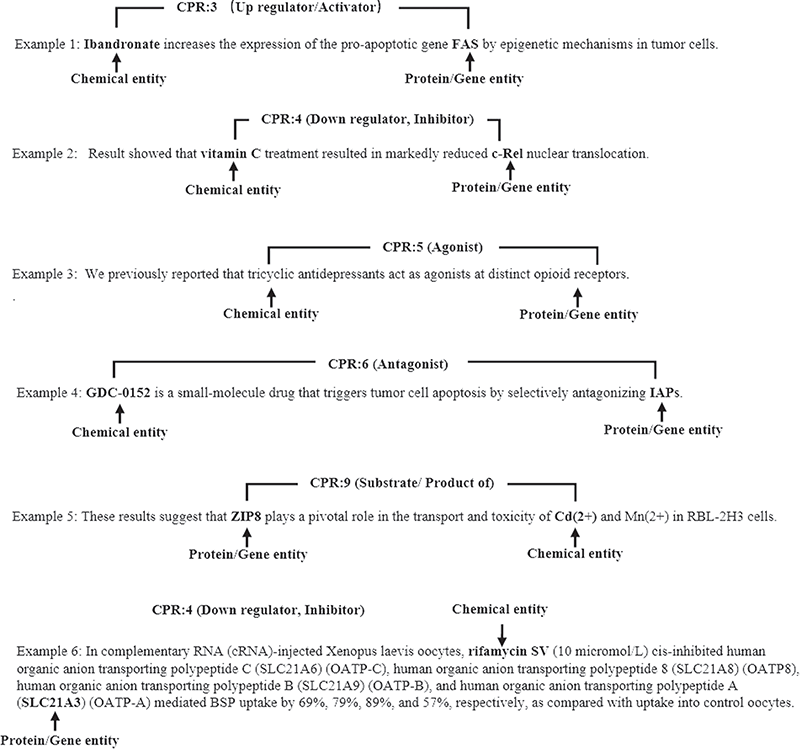

ChemProt RE works well with `ner_chemprot_clinical` find relationships between the following entities

`CHEMICAL`: Chemical entity mention type;

`GENE-Y`: gene/protein mention type that can be normalized or associated to a biological database identifier;

`GENE-N`: gene/protein mention type that cannot be normalized to a database identifier.


In [0]:
ner_tagger = MedicalNerModel()\
    .pretrained("ner_chemprot_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_tags")

ner_converter = NerConverterInternal() \
    .setInputCols(["sentence", "token", "ner_tags"]) \
    .setOutputCol("ner_chunk")

chemprot_re_model = RelationExtractionModel()\
    .pretrained("re_chemprot_clinical", "en", 'clinical/models')\
    .setInputCols(["embeddings", "pos_tags", "ner_chunk", "dependencies"])\
    .setOutputCol("relations")\
    .setMaxSyntacticDistance(4)\

chemprot_pipeline = Pipeline(stages=[
    document_assambler,
    sentence_detector,
    tokenizer,
    word_embeddings,
    pos_tagger,
    ner_tagger,
    ner_converter,
    dependency_parser,
    chemprot_re_model
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

chemprot_model = chemprot_pipeline.fit(empty_data)

ner_chemprot_clinical download started this may take some time.
Approximate size to download 15.3 MB
[OK!]
re_chemprot_clinical download started this may take some time.
Approximate size to download 5.9 MB
[OK!]


In [0]:
text='''
In this study, we examined the effects of mitiglinide on various cloned K(ATP) channels (Kir6.2/SUR1, Kir6.2/SUR2A, and Kir6.2/SUR2B) reconstituted in COS-1 cells, and compared them to another meglitinide-related compound, nateglinide. Patch-clamp analysis using inside-out recording configuration showed that mitiglinide inhibits the Kir6.2/SUR1 channel currents in a dose-dependent manner (IC50 value, 100 nM) but does not significantly inhibit either Kir6.2/SUR2A or Kir6.2/SUR2B channel currents even at high doses (more than 10 microM). Nateglinide inhibits Kir6.2/SUR1 and Kir6.2/SUR2B channels at 100 nM, and inhibits Kir6.2/SUR2A channels at high concentrations (1 microM). Binding experiments on mitiglinide, nateglinide, and repaglinide to SUR1 expressed in COS-1 cells revealed that they inhibit the binding of [3H]glibenclamide to SUR1 (IC50 values: mitiglinide, 280 nM; nateglinide, 8 microM; repaglinide, 1.6 microM), suggesting that they all share a glibenclamide binding site. The insulin responses to glucose, mitiglinide, tolbutamide, and glibenclamide in MIN6 cells after chronic mitiglinide, nateglinide, or repaglinide treatment were comparable to those after chronic tolbutamide and glibenclamide treatment. These results indicate that, similar to the sulfonylureas, mitiglinide is highly specific to the Kir6.2/SUR1 complex, i.e., the pancreatic beta-cell K(ATP) channel, and suggest that mitiglinide may be a clinically useful anti-diabetic drug.
'''
lmodel = LightPipeline(chemprot_model)
annotations = lmodel.fullAnnotate(text)

rel_df = get_relations_df (annotations, chunk_col="ner_chunk")

rel_df[rel_df.entity1!=rel_df.entity2]

,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,0,43,53,mitiglinide,CHEMICAL,80,87,channels,GENE-N,CPR:2,0.53757155
1,0,80,87,channels,GENE-N,224,234,nateglinide,CHEMICAL,CPR:2,0.99001455
4,3,706,716,mitiglinide,CHEMICAL,751,754,SUR1,GENE-Y,CPR:4,0.629676
6,3,719,729,nateglinide,CHEMICAL,751,754,SUR1,GENE-Y,CPR:2,0.999816
7,3,736,746,repaglinide,CHEMICAL,751,754,SUR1,GENE-Y,CPR:2,0.96780753
8,3,823,839,[3H]glibenclamide,CHEMICAL,844,847,SUR1,GENE-Y,CPR:2,1.0
11,6,998,1004,insulin,GENE-N,1019,1025,glucose,CHEMICAL,CPR:2,0.63596284
12,6,998,1004,insulin,GENE-N,1028,1038,mitiglinide,CHEMICAL,CPR:2,0.5456071
13,6,998,1004,insulin,GENE-N,1041,1051,tolbutamide,CHEMICAL,CPR:3,0.9872542
14,6,998,1004,insulin,GENE-N,1058,1070,glibenclamide,CHEMICAL,CPR:3,0.98967665


# Train a Custom Relation Extraction Model

In [0]:
! wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/i2b2_clinical_rel_dataset.csv

In [0]:
import pathlib
p = pathlib.Path("i2b2_clinical_rel_dataset.csv").resolve()
local_posix_path = p.as_posix()                      # /databricks/driver/i2b2_clinical_rel_dataset.csv
spark_file_uri   = f"file:{local_posix_path}"        # file:/databricks/driver/i2b2_clinical_rel_dataset.csv
print(local_posix_path)
print(spark_file_uri)

/Workspace/Users/dag@johnsnowlabs.com/spark-nlp-workshop/databricks/python/healthcare-nlp/i2b2_clinical_rel_dataset.csv
file:/Workspace/Users/dag@johnsnowlabs.com/spark-nlp-workshop/databricks/python/healthcare-nlp/i2b2_clinical_rel_dataset.csv


In [0]:
data = (spark.read
        .option("header", True)
        .csv("file:/Workspace/Users/dag@johnsnowlabs.com/spark-nlp-workshop/databricks/python/healthcare-nlp/i2b2_clinical_rel_dataset.csv"))

data = data.select('sentence','firstCharEnt1','firstCharEnt2','lastCharEnt1','lastCharEnt2',
                   'chunk1','chunk2','label1','label2','rel','dataset')

data.show(10)

+--------------------+-------------+-------------+------------+------------+--------------------+--------------------+---------+---------+-----+-------+
|            sentence|firstCharEnt1|firstCharEnt2|lastCharEnt1|lastCharEnt2|              chunk1|              chunk2|   label1|   label2|  rel|dataset|
+--------------------+-------------+-------------+------------+------------+--------------------+--------------------+---------+---------+-----+-------+
|VITAL SIGNS - Tem...|           49|           75|          64|          84|    respiratory rate|          saturation|     test|     test|    O|   test|
|No lotions , crea...|            3|           34|           9|          42|             lotions|           incisions|treatment|  problem|TrNAP|   test|
|Because of expect...|           11|           58|          54|          68|expected long ter...|         a picc line|treatment|treatment|    O|  train|
|She states this l...|           16|           82|          31|          92|    li

In [0]:
data.groupby('dataset').count().show()

+-------+-----+
|dataset|count|
+-------+-----+
|  train|  350|
|   test|  650|
+-------+-----+



In [0]:
data.groupby('rel').count().show()

+-----+-----+
|  rel|count|
+-----+-----+
| TrIP|   14|
| TrAP|  164|
| TeCP|   26|
|    O|  414|
|TrNAP|   14|
| TrCP|   28|
|  PIP|  153|
| TrWP|   11|
| TeRP|  176|
+-----+-----+



In [0]:
from sparknlp_jsl.training import REDatasetHelper

# map entity columns to dataset columns
column_map = {
    "begin1": "firstCharEnt1",
    "end1": "lastCharEnt1",
    "begin2": "firstCharEnt2",
    "end2": "lastCharEnt2",
    "chunk1": "chunk1",
    "chunk2": "chunk2",
    "label1": "label1",
    "label2": "label2"
}

# apply preprocess function to dataframe
data = REDatasetHelper(data).create_annotation_column(
    column_map,
    ner_column_name="train_ner_chunks" # optional, default train_ner_chunks
)

train_data = data.where("dataset='train'")
test_data = data.where("dataset='test'")

In [0]:
data.show(10)

+--------------------+-------+---------+-----+--------------------+---------+------------+-------------+--------------------+------------+-------------+--------------------+
|            sentence|dataset|   label1|  rel|              chunk1|   label2|lastCharEnt2|firstCharEnt1|    train_ner_chunks|lastCharEnt1|firstCharEnt2|              chunk2|
+--------------------+-------+---------+-----+--------------------+---------+------------+-------------+--------------------+------------+-------------+--------------------+
|VITAL SIGNS - Tem...|   test|     test|    O|    respiratory rate|     test|          84|           49|[{chunk, 49, 64, ...|          64|           75|          saturation|
|No lotions , crea...|   test|treatment|TrNAP|             lotions|  problem|          42|            3|[{chunk, 3, 9, lo...|           9|           34|           incisions|
|Because of expect...|  train|treatment|    O|expected long ter...|treatment|          68|           11|[{chunk, 11, 54, ...|     

## Create graph

We will use `TFGraphBuilder` annotator which can be used to create graphs automatically in the model training pipeline.

`TFGraphBuilder` inspects the data and creates the proper graph if a suitable version of TensorFlow is available. The graph is stored in the defined folder and loaded by the approach.

You can also create a custom graph by using `tf_graph` module in Spark NLP for Healthcare.

In [0]:
#for training with existing graph 
"""!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/generic_classifier_graph/RE_in1200D_out20.pb -P /databricks/driver/re_graph/"""

'!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/generic_classifier_graph/RE_in1200D_out20.pb -P /databricks/driver/re_graph/'

In [0]:
%fs mkdirs file:/dbfs/re_graphs

res0: Boolean = true

In [0]:
%fs mkdirs file:/dbfs/re_logs

res1: Boolean = true

Graph and log folder has been created. Now, we will build graph and train the model

In [0]:
# !pip install -q tensorflow==2.12.0 tensorflow-addons

In [0]:
# TensorFlow graph file (`.pb` extension) can be produced for RE training externally. 
# **WARNING:** For training a Relation Extraction model with custom graph, please use TensorFlow version 2.3
"""
import tensorflow
from sparknlp_jsl.training import tf_graph

tf_graph.print_model_params("relation_extraction")

tf_graph.build("relation_extraction",
               build_params={"input_dim": 1200, 
                             "output_dim": 20, 
                             'batch_norm':1, 
                             "hidden_layers": [300, 200],
                             "hidden_act": "relu", 
                             'hidden_act_l2':1}, 
               model_location="/dbfs/re_graphs", 
               model_filename="rel_e.in1200.out20.pb")"""

'\nimport tensorflow\nfrom sparknlp_jsl.training import tf_graph\n\ntf_graph.print_model_params("relation_extraction")\n\ntf_graph.build("relation_extraction",\n               build_params={"input_dim": 1200, \n                             "output_dim": 20, \n                             \'batch_norm\':1, \n                             "hidden_layers": [300, 200],\n                             "hidden_act": "relu", \n                             \'hidden_act_l2\':1}, \n               model_location="/dbfs/re_graphs", \n               model_filename="rel_e.in1200.out20.pb")'

In [0]:
graph_folder= '/dbfs/re_graphs'

re_graph_builder = medical.TFGraphBuilder()\
    .setModelName("relation_extraction")\
    .setInputCols(["embeddings", "pos_tags", "train_ner_chunks", "dependencies"]) \
    .setLabelColumn("rel")\
    .setGraphFolder(graph_folder)\
    .setGraphFile("re_graph.pb")\
    .setHiddenLayers([300, 200])\
    .setHiddenAct("relu")\
    .setHiddenActL2(True)\
    .setHiddenWeightsL2(False)\
    .setBatchNorm(False)

In [0]:
document_assambler = DocumentAssembler()\
    .setInputCol("sentence")\
    .setOutputCol("sentences")

tokenizer = Tokenizer()\
    .setInputCols(["sentences"])\
    .setOutputCol("token")\

word_embeddings = WordEmbeddingsModel()\
    .pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentences", "token"])\
    .setOutputCol("embeddings")

pos_tagger = PerceptronModel()\
    .pretrained("pos_clinical", "en", "clinical/models") \
    .setInputCols(["sentences", "token"])\
    .setOutputCol("pos_tags")

dependency_parser = DependencyParserModel()\
    .pretrained("dependency_conllu", "en")\
    .setInputCols(["sentences", "pos_tags", "token"])\
    .setOutputCol("dependencies")

# set training params and upload model graph (see ../Healthcare/8.Generic_Classifier.ipynb)
reApproach = RelationExtractionApproach()\
    .setInputCols(["embeddings", "pos_tags", "train_ner_chunks", "dependencies"])\
    .setOutputCol("relations")\
    .setLabelColumn("rel")\
    .setEpochsNumber(80)\
    .setBatchSize(200)\
    .setDropout(0.5)\
    .setLearningRate(0.001)\
    .setModelFile(f"{graph_folder}/re_graph.pb")\
    .setFixImbalance(True)\
    .setFromEntity("firstCharEnt1", "lastCharEnt1", "label1")\
    .setToEntity("firstCharEnt2", "lastCharEnt2", "label2")\
    .setOutputLogsPath('/content')

finisher = Finisher()\
    .setInputCols(["relations"])\
    .setOutputCols(["relations_out"])\
    .setCleanAnnotations(False)\
    .setValueSplitSymbol(",")\
    .setAnnotationSplitSymbol(",")\
    .setOutputAsArray(False)

train_pipeline = Pipeline(stages=[
    document_assambler,
    tokenizer,
    word_embeddings,
    pos_tagger,
    dependency_parser,
    re_graph_builder,
    reApproach,
    finisher
])

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
pos_clinical download started this may take some time.
Approximate size to download 1.5 MB
[OK!]
dependency_conllu download started this may take some time.
Approximate size to download 16.7 MB
[OK!]


In [0]:
rel_model = train_pipeline.fit(train_data)

TF Graph Builder configuration:
Model name: relation_extraction
Graph folder: /dbfs/re_graphs
Graph file name: re_graph.pb
Build params: {'input_dim': 1149, 'output_dim': 27, 'hidden_layers': [300, 200], 'hidden_act': 'relu', 'hidden_act_l2': True, 'hidden_weights_l2': False, 'batch_norm': False}


2025-10-03 15:01:30.845592: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-03 15:01:30.964260: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-03 15:01:30.966081: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-03 15:01:32.452602: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


relation_extraction graph exported to /dbfs/re_graphs/re_graph.pb


In [0]:
rel_model.stages

[DocumentAssembler_7512770eb683,
 REGEX_TOKENIZER_014f5a6d277d,
 WORD_EMBEDDINGS_MODEL_9004b1d00302,
 POS_6f55785005bf,
 dependency_e7755462ba78,
 TFGraphBuilderModel_900847248132,
 RelationExtractionModel_292f192e98cc,
 Finisher_7abadbdd8fef]

In [0]:
rel_model.stages[-2]

RelationExtractionModel_292f192e98cc

In [0]:
# save model
rel_model.stages[-2].write().overwrite().save('dbfs:/databricks/driver/models/custom_RE_model')

### Evaluating The Performance of the Model

We will create a pipeline and use our trained RE model by calling with `.load` method. Then we will get predictions by transforming our test set on this pipeline.

In [0]:
customReModel = RelationExtractionModel.load("dbfs:/databricks/driver/models/custom_RE_model")\
    .setInputCols(["embeddings", "pos_tags", "train_ner_chunks", "dependencies"])\
    .setOutputCol("relations_pred")\
    .setMaxSyntacticDistance(0)

test_pipeline = Pipeline(stages=[
    document_assambler,
    tokenizer,
    word_embeddings,
    pos_tagger,
    dependency_parser,
    customReModel])

test_results = test_pipeline.fit(test_data).transform(test_data)

In [0]:
test_results.show(5)

+--------------------+-------+---------+-----+--------------------+-------+------------+-------------+--------------------+------------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+
|            sentence|dataset|   label1|  rel|              chunk1| label2|lastCharEnt2|firstCharEnt1|    train_ner_chunks|lastCharEnt1|firstCharEnt2|              chunk2|           sentences|               token|          embeddings|            pos_tags|        dependencies|relations_pred|
+--------------------+-------+---------+-----+--------------------+-------+------------+-------------+--------------------+------------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+
|VITAL SIGNS - Tem...|   test|     test|    O|    respiratory rate|   test|          84|           49|[{chunk, 49, 64, ...| 

When you check the `relations_pred` column, you can see that some of the relations between the chunk pairs were not detected this time.

Now we will get metrics using the ground truth (`rel`) and prediction (`relations_pred`) columns in the result dataframe.

In [0]:
pd_test_results = test_results.select('rel', 'relations_pred.result').toPandas()
pd_test_results.head()

,rel,result
0,O,[]
1,TrNAP,[]
2,PIP,[]
3,TeRP,[]
4,TrAP,[]


We will explode the `result` column and fill null values as `O` label.

In [0]:
pd_test_results = pd_test_results.explode("result").fillna("O")
pd_test_results.result.value_counts()

O      588
N/A     62
Name: result, dtype: int64

In [0]:
pd_test_results.rel.value_counts()

O        274
TeRP     116
TrAP     108
PIP       88
TrCP      20
TeCP      15
TrIP      11
TrNAP      9
TrWP       9
Name: rel, dtype: int64

In [0]:
from sklearn.metrics import classification_report
print(classification_report(pd_test_results["rel"], pd_test_results["result"]))

              precision    recall  f1-score   support

         N/A       0.00      0.00      0.00         0
           O       0.42      0.91      0.58       274
         PIP       0.00      0.00      0.00        88
        TeCP       0.00      0.00      0.00        15
        TeRP       0.00      0.00      0.00       116
        TrAP       0.00      0.00      0.00       108
        TrCP       0.00      0.00      0.00        20
        TrIP       0.00      0.00      0.00        11
       TrNAP       0.00      0.00      0.00         9
        TrWP       0.00      0.00      0.00         9

    accuracy                           0.38       650
   macro avg       0.04      0.09      0.06       650
weighted avg       0.18      0.38      0.24       650



## Training by Setting the Relation Direction

We have `setRelationDirectionCol` parameter that is used during training with a new separate column that specifies the relationship directions. The column should contain one of the following values:

 - `rightwards`: The first entity in the text is also the first argument of the relation (as well as the second entity in the text is the second argument). In other words, the relation arguments are ordered *left to right* in the text.
 - `leftwards`: The first entity in the text is the second argument of the relation (and the second entity in the text is the first argument).
 - `both`: Order doesn't matter (relation is symmetric).

Let's modify our example training dataset accordingly

In [0]:
data.columns

['sentence',
 'dataset',
 'label1',
 'rel',
 'chunk1',
 'label2',
 'lastCharEnt2',
 'firstCharEnt1',
 'train_ner_chunks',
 'lastCharEnt1',
 'firstCharEnt2',
 'chunk2']

In [0]:
@F.udf(T.StringType())
def encodeRelationDirection(rel, begin1, begin2):
    if rel != "O":
        if begin1 > begin2:
            return "leftwards"
        else:
            return "rightwards"
    else:
        return "both"



data = data.withColumn("rel_dir", encodeRelationDirection("rel", "firstCharEnt1", "lastCharEnt2"))

train_data = data.where("dataset='train'")
test_data = data.where("dataset='test'")

Checking the new training data with **rel_dir** column

In [0]:
train_data.select("chunk1","label1","label2","chunk2","rel","rel_dir").show(10)

+--------------------+---------+---------+--------------------+----+----------+
|              chunk1|   label1|   label2|              chunk2| rel|   rel_dir|
+--------------------+---------+---------+--------------------+----+----------+
|expected long ter...|treatment|treatment|         a picc line|   O|      both|
|    light-headedness|  problem|  problem|         diaphoresis| PIP|rightwards|
| po pain medications|treatment|  problem|            his pain|TrAP| leftwards|
|bilateral pleural...|  problem|  problem|increased work of...| PIP|rightwards|
|    her urine output|     test|  problem|           decreased|TeRP|rightwards|
|his psychiatric i...|  problem|  problem|his neurologic in...| PIP|rightwards|
|   white blood cells|     test|     test|     red blood cells|   O|      both|
|            chloride|     test|     test|                 bun|   O|      both|
|     further work-up|     test|  problem|his neurologic co...|TeCP|rightwards|
|         four liters|treatment|     tes

In [0]:
train_data\
    .selectExpr("concat(label1, \", \", label2) AS args", "rel", "rel_dir")\
    .groupBy("rel", "args", "rel_dir").count().where("count > 10").orderBy("rel").show(1000, truncate=False)

+----+--------------------+----------+-----+
|rel |args                |rel_dir   |count|
+----+--------------------+----------+-----+
|O   |test, test          |both      |59   |
|O   |treatment, treatment|both      |26   |
|O   |problem, problem    |both      |38   |
|PIP |problem, problem    |rightwards|47   |
|PIP |problem, problem    |leftwards |18   |
|TeRP|test, problem       |rightwards|57   |
|TrAP|treatment, problem  |rightwards|29   |
|TrAP|treatment, problem  |leftwards |27   |
+----+--------------------+----------+-----+



Generating a new `RelationExtractionApproach()` with `.setRelationDirectionCol("rel_dir")` and training a new model.

In [0]:
document_assambler = DocumentAssembler()\
    .setInputCol("sentence")\
    .setOutputCol("sentences")

tokenizer = Tokenizer()\
    .setInputCols(["sentences"])\
    .setOutputCol("token")\

word_embeddings = WordEmbeddingsModel()\
    .pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentences", "token"])\
    .setOutputCol("embeddings")

pos_tagger = PerceptronModel()\
    .pretrained("pos_clinical", "en", "clinical/models") \
    .setInputCols(["sentences", "token"])\
    .setOutputCol("pos_tags")

dependency_parser = DependencyParserModel()\
    .pretrained("dependency_conllu", "en")\
    .setInputCols(["sentences", "pos_tags", "token"])\
    .setOutputCol("dependencies")

reApproach = RelationExtractionApproach()\
    .setInputCols(["embeddings", "pos_tags", "train_ner_chunks", "dependencies"])\
    .setOutputCol("relations")\
    .setLabelColumn("rel")\
    .setEpochsNumber(80)\
    .setBatchSize(200)\
    .setDropout(0.5)\
    .setLearningRate(0.001)\
    .setMaxSyntacticDistance(10)\
    .setModelFile(f"{graph_folder}/re_graph.pb")\
    .setFixImbalance(True)\
    .setFromEntity("firstCharEnt1", "lastCharEnt1", "label1")\
    .setToEntity("firstCharEnt2", "lastCharEnt2", "label2")\
    .setOutputLogsPath('/rel_log')\
    .setRelationDirectionCol("rel_dir")

train_pipeline = Pipeline(
    stages=[
        document_assambler,
        tokenizer,
        word_embeddings,
        pos_tagger,
        dependency_parser,
        re_graph_builder,
        reApproach,
        finisher
])

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
pos_clinical download started this may take some time.
Approximate size to download 1.5 MB
[OK!]
dependency_conllu download started this may take some time.
Approximate size to download 16.7 MB
[OK!]


In [0]:
%%time
rel_model = train_pipeline.fit(train_data)

TF Graph Builder configuration:
Model name: relation_extraction
Graph folder: /dbfs/re_graphs
Graph file name: re_graph.pb
Build params: {'input_dim': 1149, 'output_dim': 27, 'hidden_layers': [300, 200], 'hidden_act': 'relu', 'hidden_act_l2': True, 'hidden_weights_l2': False, 'batch_norm': False}
relation_extraction graph exported to /dbfs/re_graphs/re_graph.pb
CPU times: user 1.24 s, sys: 126 ms, total: 1.37 s
Wall time: 13.9 s


In [0]:
rel_model.stages

[DocumentAssembler_cb318a592d89,
 REGEX_TOKENIZER_cb23def9c2ee,
 WORD_EMBEDDINGS_MODEL_9004b1d00302,
 POS_6f55785005bf,
 dependency_e7755462ba78,
 TFGraphBuilderModel_f7cbcfb4fc71,
 RelationExtractionModel_4cc6ef28c401,
 Finisher_7abadbdd8fef]

In [0]:
# save model
rel_model.stages[-2].write().overwrite().save('dbfs:/databricks/driver/models/rel_dir_RE_model')

### Evaluating The Performance of the Model Trained with Directions

In [0]:
customReModelDir = RelationExtractionModel.load("dbfs:/databricks/driver/models/rel_dir_RE_model")\
    .setInputCols(["embeddings", "pos_tags", "train_ner_chunks", "dependencies"])\
    .setOutputCol("relations_pred")\
    .setMaxSyntacticDistance(0)

test_pipeline_dir = Pipeline(stages=[
    document_assambler,
    tokenizer,
    word_embeddings,
    pos_tagger,
    dependency_parser,
    customReModelDir])

test_results_dir = test_pipeline_dir.fit(test_data).transform(test_data)

Now we will get metrics using the ground truth (`rel`) and prediction (`relations_pred`) columns in the result dataframe.

In [0]:
pd_test_results_dir = test_results_dir.select('rel', 'relations_pred.result').toPandas()
pd_test_results_dir.head()

,rel,result
0,O,[]
1,TrNAP,[]
2,PIP,[]
3,TeRP,[]
4,TrAP,[]


 We will explode the `result` column and fill null values as `O` label and get metrics.

In [0]:
from sklearn.metrics import classification_report

pd_test_results_dir = pd_test_results_dir.explode("result").fillna("O")
print(classification_report(pd_test_results_dir["rel"], pd_test_results_dir["result"]))

              precision    recall  f1-score   support

           O       0.42      0.96      0.58       274
         PIP       0.00      0.00      0.00        88
        TeCP       0.00      0.00      0.00        15
        TeRP       0.00      0.00      0.00       116
        TrAP       0.00      0.00      0.00       108
        TrCP       0.00      0.00      0.00        20
        TrIP       0.00      0.00      0.00        11
       TrNAP       0.00      0.00      0.00         9
        TrWP       0.00      0.00      0.00         9

    accuracy                           0.41       650
   macro avg       0.05      0.11      0.06       650
weighted avg       0.18      0.41      0.25       650



As you can see, this model is slightly better than the previous one.

## Load trained model from disk

In [0]:
document_assambler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentence_detector = SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")\

word_embeddings = WordEmbeddingsModel()\
    .pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

pos_tagger = PerceptronModel()\
    .pretrained("pos_clinical", "en", "clinical/models") \
    .setInputCols(["sentence", "token"])\
    .setOutputCol("pos_tags")

dependency_parser = DependencyParserModel()\
    .pretrained("dependency_conllu", "en")\
    .setInputCols(["sentence", "pos_tags", "token"])\
    .setOutputCol("dependencies")

clinical_ner_tagger = MedicalNerModel()\
    .pretrained("ner_clinical",'en','clinical/models')\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_tags")

ner_chunker = NerConverterInternal()\
    .setInputCols(["sentence", "token", "ner_tags"])\
    .setOutputCol("ner_chunk")

loaded_re_Model = RelationExtractionModel()\
    .load("dbfs:/databricks/driver/models/rel_dir_RE_model")\
    .setInputCols(["embeddings", "pos_tags", "ner_chunk", "dependencies"]) \
    .setOutputCol("relations")\
    .setRelationPairs(["problem-test", "problem-treatment"])\
    .setPredictionThreshold(0.8)\
    .setMaxSyntacticDistance(3)

pipeline = Pipeline(
    stages=[
        document_assambler,
        sentence_detector,
        tokenizer,
        word_embeddings,
        pos_tagger,
        dependency_parser,
        clinical_ner_tagger,
        ner_chunker,
        loaded_re_Model
])

empty_data = spark.createDataFrame([[""]]).toDF("text")
model = pipeline.fit(empty_data)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
pos_clinical download started this may take some time.
Approximate size to download 1.5 MB
[OK!]
dependency_conllu download started this may take some time.
Approximate size to download 16.7 MB
[OK!]
ner_clinical download started this may take some time.
Approximate size to download 13.9 MB
[OK!]


In [0]:
text ="""A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ),
one prior episode of HTG-induced pancreatitis three years prior to presentation,  associated with an acute hepatitis , and obesity with a body mass index ( BMI ) of 33.5 kg/m2, presented with a one-week history of polyuria, polydipsia, poor appetite, and vomiting. Two weeks prior to presentation , she was treated with a five-day course of amoxicillin for a respiratory tract infection. She was on metformin , glipizide , and dapagliflozin for T2DM and gemfibrozil for HTG . She had been on dapagliflozin for six months at the time of presentation. Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , or rigidity . Pertinent laboratory findings on admission were : serum glucose 111 mg/dl , bicarbonate 18 mmol/l , anion gap 20 , creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , glycated hemoglobin ( HbA1c ) 10% , and venous pH 7.27 . Serum lipase was normal at 43 U/L . Serum acetone levels could not be assessed as blood samples kept hemolyzing due to significant lipemia . The patient was initially admitted for starvation ketosis , as she reported poor oral intake for three days prior to admission . However , serum chemistry obtained six hours after presentation revealed her glucose was 186 mg/dL , the anion gap was still elevated at 21 , serum bicarbonate was 16 mmol/L , triglyceride level peaked at 2050 mg/dL , and lipase was 52 U/L . The β-hydroxybutyrate level was obtained and found to be elevated at 5.29 mmol/L - the original sample was centrifuged and the chylomicron layer removed prior to analysis due to interference from turbidity caused by lipemia again. The patient was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , and metformin 1000 mg two times a day . It was determined that all SGLT2 inhibitors should be discontinued indefinitely .
She had close follow-up with endocrinology post discharge .
"""

re_model_light = LightPipeline(model)

annotations = re_model_light.fullAnnotate(text)

rel_df = get_relations_df(annotations)

rel_df

,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence


# End-to-end trained Models using BioBERT
#### Latest addition to Spark NLP for Heathcare - (Requires Spark NLP 2.7.3+ and Spark NLP JSL 2.7.3+)

These models are trained as end-to-end bert models using BioBERT and ported in to the Spark NLP ecosystem.

They offer SOTA performance on most benchmark tasks and outperform our existing Relation Extraction Models.

## ADE ReDL

In [0]:
ner_tagger = MedicalNerModel.pretrained("ner_ade_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_tags")

ade_re_ner_chunk_filter = RENerChunksFilter() \
    .setInputCols(["ner_chunk", "dependencies"])\
    .setOutputCol("re_ner_chunks")\
    .setMaxSyntacticDistance(10)\
    .setRelationPairs(["drug-ade, ade-drug"])

ade_re_model = RelationExtractionDLModel()\
    .pretrained('redl_ade_biobert', 'en', "clinical/models") \
    .setPredictionThreshold(0.5)\
    .setInputCols(["re_ner_chunks", "sentence"]) \
    .setOutputCol("relations")

ade_pipeline = Pipeline(
    stages=[
        document_assambler,
        sentence_detector,
        tokenizer,
        word_embeddings,
        pos_tagger,
        ner_tagger,
        ner_chunker,
        dependency_parser,
        ade_re_ner_chunk_filter,
        ade_re_model
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

ade_model = ade_pipeline.fit(empty_data)

ner_ade_clinical download started this may take some time.
Approximate size to download 13.9 MB
[OK!]
redl_ade_biobert download started this may take some time.
Approximate size to download 383.1 MB
[OK!]


In [0]:
text ="""A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands."""

ade_lmodel = LightPipeline(ade_model)
ade_results = ade_lmodel.fullAnnotate(text)

rel_df = get_relations_df(ade_results)

rel_df

,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,0,25,32,naproxen,DRUG,137,148,tense bullae,ADE,1,0.9989047
1,0,25,32,naproxen,DRUG,154,210,cutaneous fragility on the face and the back of the hands,ADE,1,0.9989704
2,0,87,95,oxaprozin,DRUG,137,148,tense bullae,ADE,1,0.99895453
3,0,87,95,oxaprozin,DRUG,154,210,cutaneous fragility on the face and the back of the hands,ADE,1,0.99900633


## Clinical ReDL

In [0]:
clinical_ner_tagger = MedicalNerModel.pretrained("ner_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_tags")

clinical_re_ner_chunk_filter = RENerChunksFilter() \
    .setInputCols(["ner_chunk", "dependencies"])\
    .setOutputCol("re_ner_chunks")\
    .setMaxSyntacticDistance(4)\
    .setRelationPairs(["problem-test", "problem-treatment"])# we can set the possible relation pairs (if not set, all the relations will be calculated)

clinical_re_Model = medical.RelationExtractionDLModel().pretrained('redl_clinical_biobert', "en", "clinical/models")\
    .setPredictionThreshold(0.9)\
    .setInputCols(["re_ner_chunks", "sentence"]) \
    .setOutputCol("relations")\
    .setRelationPairsCaseSensitive(False)\
    .setRelationTypePerPair({"TrAP": ["PROBLEM-TREATMENT"],
                             "TrIP": ["TREATMENT-PROBLEM"],
                             "TrWP": ["TREATMENT-PROBLEM"],
                             "TrCP": ["TREATMENT-PROBLEM"],
                             "TrAP": ["TREATMENT-PROBLEM"],
                             "TrNAP":["TREATMENT-PROBLEM"],
                             "TeCP": ["PROBLEM-TEST"],
                             "TeRP": ["PROBLEM-TEST"],
                             "PIP":  ["PROBLEM-PROBLEM"]
                             })

pipeline = Pipeline(
    stages=[
        document_assambler,
        sentence_detector,
        tokenizer,
        word_embeddings,
        pos_tagger,
        clinical_ner_tagger,
        ner_chunker,
        dependency_parser,
        clinical_re_ner_chunk_filter,
        clinical_re_Model
])

empty_data = spark.createDataFrame([[""]]).toDF("text")
model = pipeline.fit(empty_data)

ner_clinical download started this may take some time.
Approximate size to download 13.9 MB
[OK!]
redl_clinical_biobert download started this may take some time.
Approximate size to download 383.1 MB
[OK!]


In [0]:
text ="""A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ),
one prior episode of HTG-induced pancreatitis three years prior to presentation,  associated with an acute hepatitis , and obesity with a body mass index ( BMI ) of 33.5 kg/m2 , presented with a one-week history of polyuria , polydipsia , poor appetite , and vomiting . Two weeks prior to presentation , she was treated with a five-day course of amoxicillin for a respiratory tract infection . She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG . She had been on dapagliflozin for six months at the time of presentation. Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , or rigidity . Pertinent laboratory findings on admission were : serum glucose 111 mg/dl , bicarbonate 18 mmol/l , anion gap 20 , creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , glycated hemoglobin ( HbA1c ) 10% , and venous pH 7.27 . Serum lipase was normal at 43 U/L . Serum acetone levels could not be assessed as blood samples kept hemolyzing due to significant lipemia . The patient was initially admitted for starvation ketosis , as she reported poor oral intake for three days prior to admission . However , serum chemistry obtained six hours after presentation revealed her glucose was 186 mg/dL , the anion gap was still elevated at 21 , serum bicarbonate was 16 mmol/L , triglyceride level peaked at 2050 mg/dL , and lipase was 52 U/L . The β-hydroxybutyrate level was obtained and found to be elevated at 5.29 mmol/L - the original sample was centrifuged and the chylomicron layer removed prior to analysis due to interference from turbidity caused by lipemia again . The patient was treated with an insulin drip for euDKA and HTG with a reduction in the anion gap to 13 and triglycerides to 1400 mg/dL , within 24 hours . Her euDKA was thought to be precipitated by her respiratory tract infection in the setting of SGLT2 inhibitor use . The patient was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , and metformin 1000 mg two times a day . It was determined that all SGLT2 inhibitors should be discontinued indefinitely .
She had close follow-up with endocrinology post discharge .
"""
lmodel = LightPipeline(model)
annotations = lmodel.fullAnnotate(text)

rel_df = get_relations_df(annotations)

rel_df = rel_df[(rel_df.relation!="O")]

rel_df

,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
1,1,511,521,amoxicillin,TREATMENT,527,555,a respiratory tract infection,PROBLEM,TrAP,0.99863595
2,2,570,578,metformin,TREATMENT,616,619,T2DM,PROBLEM,TrAP,0.99126583
3,2,582,590,glipizide,TREATMENT,616,619,T2DM,PROBLEM,TrAP,0.99036837
4,2,598,610,dapagliflozin,TREATMENT,616,619,T2DM,PROBLEM,TrAP,0.9954288
5,4,738,757,Physical examination,TEST,795,809,dry oral mucosa,PROBLEM,TeRP,0.9983334
6,5,829,853,her abdominal examination,TEST,874,883,tenderness,PROBLEM,TeRP,0.99468285
7,5,829,853,her abdominal examination,TEST,887,894,guarding,PROBLEM,TeRP,0.9940719
8,5,829,853,her abdominal examination,TEST,901,908,rigidity,PROBLEM,TeRP,0.99489564


## Clinical Temporal Events ReDL

In [0]:
events_ner_tagger = MedicalNerModel.pretrained("ner_events_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_tags")

events_re_ner_chunk_filter = RENerChunksFilter() \
    .setInputCols(["ner_chunk", "dependencies"])\
    .setOutputCol("re_ner_chunks")

events_re_Model = RelationExtractionDLModel() \
    .pretrained('redl_temporal_events_biobert', "en", "clinical/models")\
    .setPredictionThreshold(0.45)\
    .setInputCols(["re_ner_chunks", "sentence"]) \
    .setOutputCol("relations")

pipeline = Pipeline(
    stages=[
        document_assambler,
        sentence_detector,
        tokenizer,
        word_embeddings,
        pos_tagger,
        events_ner_tagger,
        ner_chunker,
        dependency_parser,
        events_re_ner_chunk_filter,
        events_re_Model
])

empty_data = spark.createDataFrame([[""]]).toDF("text")
model = pipeline.fit(empty_data)

ner_events_clinical download started this may take some time.
Approximate size to download 13.8 MB
[OK!]
redl_temporal_events_biobert download started this may take some time.
Approximate size to download 383.1 MB
[OK!]


In [0]:
text ="""The patient is a 68-year-old Caucasian male with past medical history of diabetes mellitus.
He was doing fairly well until last week while mowing the lawn, he injured his right foot. """

lmodel = LightPipeline(model)
annotations = lmodel.fullAnnotate(text)

rel_df = get_relations_df (annotations)

rel_df.confidence = rel_df.confidence.astype(float)

rel_df = rel_df[(rel_df.relation!="O")]

rel_df[(rel_df.relation!="O")&(rel_df.entity1!=rel_df.entity2)]

,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,1,99,115,doing fairly well,OCCURRENCE,123,131,last week,DURATION,BEFORE,0.596887
1,1,123,131,last week,DURATION,139,153,mowing the lawn,OCCURRENCE,OVERLAP,0.665236
2,1,139,153,mowing the lawn,OCCURRENCE,159,180,injured his right foot,PROBLEM,OVERLAP,0.536443


In [0]:
text ="""She is admitted to The John Hopkins Hospital 2 days ago with a history of gestational diabetes mellitus diagnosed.
She was seen by the endocrinology service and she was discharged on 03/02/2018 on 40 units of insulin glargine,
12 units of insulin lispro, and metformin 1000 mg two times a day. She had close follow-up with endocrinology post discharge.
"""

annotations = lmodel.fullAnnotate(text)

rel_df = get_relations_df (annotations)

rel_df.confidence = rel_df.confidence.astype(float)

rel_df[(rel_df.relation!="O")]


,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,0,7,14,admitted,OCCURRENCE,19,43,The John Hopkins Hospital,CLINICAL_DEPT,AFTER,0.974332
1,0,7,14,admitted,OCCURRENCE,45,54,2 days ago,DATE,BEFORE,0.614918
2,0,7,14,admitted,OCCURRENCE,74,102,gestational diabetes mellitus,PROBLEM,BEFORE,0.866523
3,0,19,43,The John Hopkins Hospital,CLINICAL_DEPT,45,54,2 days ago,DATE,OVERLAP,0.716698
4,0,19,43,The John Hopkins Hospital,CLINICAL_DEPT,74,102,gestational diabetes mellitus,PROBLEM,BEFORE,0.591632
5,0,45,54,2 days ago,DATE,74,102,gestational diabetes mellitus,PROBLEM,BEFORE,0.556411
6,1,131,155,the endocrinology service,CLINICAL_DEPT,169,178,discharged,OCCURRENCE,BEFORE,0.661403
7,1,131,155,the endocrinology service,CLINICAL_DEPT,183,192,03/02/2018,DATE,OVERLAP,0.698660
8,1,131,155,the endocrinology service,CLINICAL_DEPT,209,224,insulin glargine,TREATMENT,OVERLAP,0.787637
9,1,131,155,the endocrinology service,CLINICAL_DEPT,239,252,insulin lispro,TREATMENT,OVERLAP,0.748179


## Human Phenotype - Gene ReDL

In [0]:
pgr_ner_tagger = MedicalNerModel.pretrained("ner_human_phenotype_gene_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_tags")

pgr_re_ner_chunk_filter = RENerChunksFilter() \
    .setInputCols(["ner_chunk", "dependencies"])\
    .setOutputCol("re_ner_chunks")\
    .setMaxSyntacticDistance(7)\
    .setRelationPairs(["GENE-HP", "HP-GENE"])

pgr_re_Model = RelationExtractionDLModel() \
    .pretrained('redl_human_phenotype_gene_biobert', "en", "clinical/models")\
    .setPredictionThreshold(0.6)\
    .setInputCols(["re_ner_chunks", "sentence"]) \
    .setOutputCol("relations")\


pipeline = Pipeline(
    stages=[
        document_assambler,
        sentence_detector,
        tokenizer,
        word_embeddings,
        pos_tagger,
        pgr_ner_tagger,
        ner_chunker,
        dependency_parser,
        pgr_re_ner_chunk_filter,
        pgr_re_Model
])

empty_data = spark.createDataFrame([[""]]).toDF("text")
model = pipeline.fit(empty_data)

ner_human_phenotype_gene_clinical download started this may take some time.
Approximate size to download 14 MB
[OK!]
redl_human_phenotype_gene_biobert download started this may take some time.
Approximate size to download 383.1 MB
[OK!]


In [0]:
text = "She has a hearing loss and short stature, mutations in the SH3PXD2B gene coding for the Tks4 protein are responsible for the autosomal recessive."

lmodel = LightPipeline(model)
annotations = lmodel.fullAnnotate(text)

rel_df = get_relations_df (annotations)

rel_df = rel_df[(rel_df.relation!='0')]

rel_df

,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,0,10,21,hearing loss,HP,59,66,SH3PXD2B,GENE,1,0.9079312
1,0,27,39,short stature,HP,59,66,SH3PXD2B,GENE,1,0.88993514
2,0,59,66,SH3PXD2B,GENE,125,143,autosomal recessive,HP,1,0.9688051


## Drug-Drug Interaction ReDL

In [0]:
ddi_ner_tagger = MedicalNerModel.pretrained("ner_posology", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_tags")

ddi_re_ner_chunk_filter = RENerChunksFilter() \
    .setInputCols(["ner_chunk", "dependencies"])\
    .setOutputCol("re_ner_chunks")\
    .setMaxSyntacticDistance(4)

ddi_re_Model = RelationExtractionDLModel() \
    .pretrained('redl_drug_drug_interaction_biobert', "en", "clinical/models")\
    .setPredictionThreshold(0.9)\
    .setInputCols(["re_ner_chunks", "sentence"]) \
    .setOutputCol("relations")

pipeline = Pipeline(
    stages=[
        document_assambler,
        sentence_detector,
        tokenizer,
        word_embeddings,
        pos_tagger,
        ddi_ner_tagger,
        ner_chunker,
        dependency_parser,
        ddi_re_ner_chunk_filter,
        ddi_re_Model
])

empty_data = spark.createDataFrame([[""]]).toDF("text")
model = pipeline.fit(empty_data)

ner_posology download started this may take some time.
Approximate size to download 13.8 MB
[OK!]
redl_drug_drug_interaction_biobert download started this may take some time.
Approximate size to download 383.1 MB
[OK!]


In [0]:
text='When carbamazepine is withdrawn from the combination therapy, aripiprazole dose should then be reduced. \
If additional adrenergic drugs are to be administered by any route, \
they should be used with caution because the pharmacologically predictable sympathetic effects of Metformin may be potentiated'

lmodel = LightPipeline(model)
annotations = lmodel.fullAnnotate(text)

rel_df = get_relations_df (annotations)

rel_df

,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,0,5,17,carbamazepine,DRUG,62,73,aripiprazole,DRUG,DDI-false,0.91685396


## Drug-Protein Interaction ReDL

In [0]:
drugprot_ner_tagger = MedicalNerModel.pretrained("ner_drugprot_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_tags")

ner_converter = NerConverterInternal()\
    .setInputCols(["sentence", "token", "ner_tags"])\
    .setOutputCol("ner_chunk")

# Set a filter on pairs of named entities which will be treated as relation candidates
drugprot_re_ner_chunk_filter = RENerChunksFilter()\
    .setInputCols(["ner_chunk", "dependencies"])\
    .setOutputCol("re_ner_chunks")\
    .setMaxSyntacticDistance(4)\
    .setRelationPairs(["checmical-gene", "chemical-gene_and_chemical", "gene_and_chemical-gene"])

drugprot_re_Model = RelationExtractionDLModel()\
    .pretrained('redl_drugprot_biobert', "en", "clinical/models")\
    .setPredictionThreshold(0.9)\
    .setInputCols(["re_ner_chunks", "sentence"])\
    .setOutputCol("relations")

pipeline = Pipeline(stages=[document_assambler, sentence_detector, tokenizer, word_embeddings, drugprot_ner_tagger, ner_converter, pos_tagger, dependency_parser, drugprot_re_ner_chunk_filter, drugprot_re_Model])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model = pipeline.fit(empty_data)

ner_drugprot_clinical download started this may take some time.
Approximate size to download 14 MB
[OK!]
redl_drugprot_biobert download started this may take some time.
Approximate size to download 383.1 MB
[OK!]


In [0]:
text='''Lipid specific activation of the murine P4-ATPase Atp8a1 (ATPase II). The asymmetric transbilayer distribution of phosphatidylserine (PS) in the mammalian plasma membrane and secretory vesicles is maintained, in part, by an ATP-dependent transporter. This aminophospholipid "flippase" selectively transports PS to the cytosolic leaflet of the bilayer and is sensitive to vanadate, Ca(2+), and modification by sulfhydryl reagents. Although the flippase has not been positively identified, a subfamily of P-type ATPases has been proposed to function as transporters of amphipaths, including PS and other phospholipids. A candidate PS flippase ATP8A1 (ATPase II), originally isolated from bovine secretory vesicles, is a member of this subfamily based on sequence homology to the founding member of the subfamily, the yeast protein Drs2, which has been linked to ribosomal assembly, the formation of Golgi-coated vesicles, and the maintenance of PS asymmetry. To determine if ATP8A1 has biochemical characteristics consistent with a PS flippase, a murine homologue of this enzyme was expressed in insect cells and purified. The purified Atp8a1 is inactive in detergent micelles or in micelles containing phosphatidylcholine, phosphatidic acid, or phosphatidylinositol, is minimally activated by phosphatidylglycerol or phosphatidylethanolamine (PE), and is maximally activated by PS. The selectivity for PS is dependent upon multiple elements of the lipid structure. Similar to the plasma membrane PS transporter, Atp8a1 is activated only by the naturally occurring sn-1,2-glycerol isomer of PS and not the sn-2,3-glycerol stereoisomer. Both flippase and Atp8a1 activities are insensitive to the stereochemistry of the serine headgroup. Most modifications of the PS headgroup structure decrease recognition by the plasma membrane PS flippase. Activation of Atp8a1 is also reduced by these modifications; phosphatidylserine-O-methyl ester, lysophosphatidylserine, glycerophosphoserine, and phosphoserine, which are not transported by the plasma membrane flippase, do not activate Atp8a1. Weakly translocated lipids (PE, phosphatidylhydroxypropionate, and phosphatidylhomoserine) are also weak Atp8a1 activators. However, N-methyl-phosphatidylserine, which is transported by the plasma membrane flippase at a rate equivalent to PS, is incapable of activating Atp8a1 activity. These results indicate that the ATPase activity of the secretory granule Atp8a1 is activated by phospholipids binding to a specific site whose properties (PS selectivity, dependence upon glycerol but not serine, stereochemistry, and vanadate sensitivity) are similar to, but distinct from, the properties of the substrate binding site of the plasma membrane flippase.'''

lmodel = LightPipeline(model)

results = lmodel.fullAnnotate(text)

In [0]:
results[0].keys()

dict_keys(['document', 'ner_chunk', 'ner_tags', 'token', 'relations', 'embeddings', 'pos_tags', 're_ner_chunks', 'dependencies', 'sentence'])

In [0]:
results[0]["ner_chunk"]

[Annotation(chunk, 33, 48, murine P4-ATPase, {'entity': 'GENE', 'confidence': '0.75505', 'ner_source': 'ner_chunk', 'chunk': '0', 'sentence': '0'}, []),
 Annotation(chunk, 50, 55, Atp8a1, {'entity': 'GENE', 'confidence': '0.9911', 'ner_source': 'ner_chunk', 'chunk': '1', 'sentence': '0'}, []),
 Annotation(chunk, 58, 66, ATPase II, {'entity': 'GENE', 'confidence': '0.8749', 'ner_source': 'ner_chunk', 'chunk': '2', 'sentence': '0'}, []),
 Annotation(chunk, 114, 131, phosphatidylserine, {'entity': 'CHEMICAL', 'confidence': '0.9794', 'ner_source': 'ner_chunk', 'chunk': '3', 'sentence': '1'}, []),
 Annotation(chunk, 134, 135, PS, {'entity': 'CHEMICAL', 'confidence': '0.7845', 'ner_source': 'ner_chunk', 'chunk': '4', 'sentence': '1'}, []),
 Annotation(chunk, 224, 248, ATP-dependent transporter, {'entity': 'GENE_AND_CHEMICAL', 'confidence': '0.77744997', 'ner_source': 'ner_chunk', 'chunk': '5', 'sentence': '1'}, []),
 Annotation(chunk, 256, 282, aminophospholipid "flippase, {'entity': 'GENE_A

In [0]:
results[0]["relations"]

[Annotation(category, 114, 248, SUBSTRATE, {'chunk2': 'ATP-dependent transporter', 'confidence': '0.9931178', 'entity2_end': '248', 'syntactic_distance': '3', 'chunk1': 'phosphatidylserine', 'entity1': 'CHEMICAL', 'entity2_begin': '224', 'chunk2_confidence': '0.77744997', 'entity1_begin': '114', 'sentence': '1', 'entity1_end': '131', 'entity2': 'GENE_AND_CHEMICAL', 'chunk1_confidence': '0.9794', 'context': 'The asymmetric transbilayer distribution of phosphatidylserine (PS) in the mammalian plasma membrane and secretory vesicles is maintained, in part, by an ATP-dependent transporter.'}, []),
 Annotation(category, 134, 248, SUBSTRATE, {'chunk2': 'ATP-dependent transporter', 'confidence': '0.9978284', 'entity2_end': '248', 'syntactic_distance': '4', 'chunk1': 'PS', 'entity1': 'CHEMICAL', 'entity2_begin': '224', 'chunk2_confidence': '0.77744997', 'entity1_begin': '134', 'sentence': '1', 'entity1_end': '135', 'entity2': 'GENE_AND_CHEMICAL', 'chunk1_confidence': '0.7845', 'context': 'The a

In [0]:
rel_df = get_relations_df (results)

rel_df

,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,1,114,131,phosphatidylserine,CHEMICAL,224,248,ATP-dependent transporter,GENE_AND_CHEMICAL,SUBSTRATE,0.9931178
1,1,134,135,PS,CHEMICAL,224,248,ATP-dependent transporter,GENE_AND_CHEMICAL,SUBSTRATE,0.9978284
2,2,256,282,"aminophospholipid ""flippase",GENE_AND_CHEMICAL,308,309,PS,CHEMICAL,SUBSTRATE,0.9968598


## Chemical–Protein Interactions (ChemProt) ReDL

In [0]:
chemprot_ner_tagger = MedicalNerModel.pretrained("ner_chemprot_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_tags")

chemprot_re_ner_chunk_filter = RENerChunksFilter() \
    .setInputCols(["ner_chunk", "dependencies"])\
    .setOutputCol("re_ner_chunks")\
    .setMaxSyntacticDistance(4)

chemprot_re_Model = RelationExtractionDLModel() \
    .pretrained('redl_chemprot_biobert', "en", "clinical/models")\
    .setPredictionThreshold(0.9)\
    .setInputCols(["re_ner_chunks", "sentence"]) \
    .setOutputCol("relations")

pipeline = Pipeline(
    stages=[
        document_assambler,
        sentence_detector,
        tokenizer,
        word_embeddings,
        pos_tagger,
        chemprot_ner_tagger,
        ner_chunker,
        dependency_parser,
        chemprot_re_ner_chunk_filter,
        chemprot_re_Model
])


empty_data = spark.createDataFrame([[""]]).toDF("text")
model = pipeline.fit(empty_data)

ner_chemprot_clinical download started this may take some time.
Approximate size to download 15.3 MB
[OK!]
redl_chemprot_biobert download started this may take some time.
Approximate size to download 383.1 MB
[OK!]


In [0]:
chemprot_re_Model

RelationExtractionModelDL_2bd6224852c7

In [0]:
text='''
In this study, we examined the effects of mitiglinide on various cloned K(ATP) channels (Kir6.2/SUR1, Kir6.2/SUR2A, and Kir6.2/SUR2B) reconstituted in COS-1 cells, and compared them to another meglitinide-related compound, nateglinide. Patch-clamp analysis using inside-out recording configuration showed that mitiglinide inhibits the Kir6.2/SUR1 channel currents in a dose-dependent manner (IC50 value, 100 nM) but does not significantly inhibit either Kir6.2/SUR2A or Kir6.2/SUR2B channel currents even at high doses (more than 10 microM). Nateglinide inhibits Kir6.2/SUR1 and Kir6.2/SUR2B channels at 100 nM, and inhibits Kir6.2/SUR2A channels at high concentrations (1 microM). Binding experiments on mitiglinide, nateglinide, and repaglinide to SUR1 expressed in COS-1 cells revealed that they inhibit the binding of [3H]glibenclamide to SUR1 (IC50 values: mitiglinide, 280 nM; nateglinide, 8 microM; repaglinide, 1.6 microM), suggesting that they all share a glibenclamide binding site. The insulin responses to glucose, mitiglinide, tolbutamide, and glibenclamide in MIN6 cells after chronic mitiglinide, nateglinide, or repaglinide treatment were comparable to those after chronic tolbutamide and glibenclamide treatment. These results indicate that, similar to the sulfonylureas, mitiglinide is highly specific to the Kir6.2/SUR1 complex, i.e., the pancreatic beta-cell K(ATP) channel, and suggest that mitiglinide may be a clinically useful anti-diabetic drug.
'''
lmodel = LightPipeline(model)
annotations = lmodel.fullAnnotate(text)

rel_df = get_relations_df (annotations)

rel_df[rel_df.entity1!=rel_df.entity2]

,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,0,43,53,mitiglinide,CHEMICAL,80,87,channels,GENE-N,CPR:2,0.9993729
1,0,80,87,channels,GENE-N,224,234,nateglinide,CHEMICAL,CPR:2,0.99562293
4,3,706,716,mitiglinide,CHEMICAL,751,754,SUR1,GENE-Y,CPR:2,0.99915874
6,3,719,729,nateglinide,CHEMICAL,751,754,SUR1,GENE-Y,CPR:2,0.9987863
7,3,736,746,repaglinide,CHEMICAL,751,754,SUR1,GENE-Y,CPR:2,0.99850047
8,3,823,839,[3H]glibenclamide,CHEMICAL,844,847,SUR1,GENE-Y,CPR:2,0.9979025
10,6,998,1004,insulin,GENE-N,1019,1025,glucose,CHEMICAL,CPR:2,0.97875994
11,6,998,1004,insulin,GENE-N,1028,1038,mitiglinide,CHEMICAL,CPR:2,0.9898919
12,6,998,1004,insulin,GENE-N,1041,1051,tolbutamide,CHEMICAL,CPR:2,0.98977774
13,6,998,1004,insulin,GENE-N,1058,1070,glibenclamide,CHEMICAL,CPR:2,0.99023926


# Filtering Entity Types
We can filter the entities that can form a relation by using a parameter called `setRelationTypePerPair()`.

We give list of entity pairs per relations which limit the entities can form a relation to this parameter. For example, `{TrAP: [“PROBLEM”, "TREATMENT"]}` which only let “PROBLEM" and "TREATMENT" NER entities in a "TrAP" relation.


Now, we will define a RE pipeline with `setRelationTypePerPair({"TrAP": ["PROBLEM-TREATMENT"]})` to see only "PROBLEM" and "TREATMENT" entities in "TrAP" relation type.

In [0]:
ner_tagger = MedicalNerModel.pretrained("ner_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_tags")

reModel = RelationExtractionModel()\
    .pretrained("re_clinical", "en", 'clinical/models')\
    .setInputCols(["embeddings", "pos_tags", "ner_chunk", "dependencies"])\
    .setOutputCol("relations")\
    .setMaxSyntacticDistance(10)\
    .setRelationPairsCaseSensitive(False)\
    .setRelationTypePerPair({"TrAP": ["PROBLEM-TREATMENT"]})

re_pipeline = Pipeline(stages=[
    document_assambler,
    sentence_detector,
    tokenizer,
    word_embeddings,
    pos_tagger,
    ner_tagger,
    ner_chunker,
    dependency_parser,
    reModel
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

re_model = re_pipeline.fit(empty_data)

ner_clinical download started this may take some time.
Approximate size to download 13.9 MB
[OK!]
re_clinical download started this may take some time.
Approximate size to download 6 MB
[OK!]


In [0]:
re_lmodel = LightPipeline(re_model)

text= "A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis three years prior to presentation,  associated with an acute hepatitis , and obesity with a body mass index ( BMI ) of 33.5 kg/m2 , presented with a one-week history of polyuria , polydipsia , poor appetite , and vomiting . Two weeks prior to presentation , she was treated with a five-day course of amoxicillin for a respiratory tract infection . She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG . She had been on dapagliflozin for six months at the time of presentation. Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , or rigidity . Pertinent laboratory findings on admission were : serum glucose 111 mg/dl , bicarbonate 18 mmol/l , anion gap 20 , creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , glycated hemoglobin ( HbA1c ) 10% , and venous pH 7.27 . Serum lipase was normal at 43 U/L . Serum acetone levels could not be assessed as blood samples kept hemolyzing due to significant lipemia . The patient was initially admitted for starvation ketosis , as she reported poor oral intake for three days prior to admission . However , serum chemistry obtained six hours after presentation revealed her glucose was 186 mg/dL , the anion gap was still elevated at 21 , serum bicarbonate was 16 mmol/L , triglyceride level peaked at 2050 mg/dL , and lipase was 52 U/L . The β-hydroxybutyrate level was obtained and found to be elevated at 5.29 mmol/L - the original sample was centrifuged and the chylomicron layer removed prior to analysis due to interference from turbidity caused by lipemia again . The patient was treated with an insulin drip for euDKA and HTG with a reduction in the anion gap to 13 and triglycerides to 1400 mg/dL , within 24 hours . Her euDKA was thought to be precipitated by her respiratory tract infection in the setting of SGLT2 inhibitor use . The patient was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , and metformin 1000 mg two times a day . It was determined that all SGLT2 inhibitors should be discontinued indefinitely . She had close follow-up with endocrinology post discharge ."

re_results = re_lmodel.fullAnnotate(text)

In [0]:
rel_df = get_relations_df(re_results)

rel_df[rel_df["relation"]=="TrAP"]

,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
8,1,511,521,amoxicillin,TREATMENT,527,555,a respiratory tract infection,PROBLEM,TrAP,0.9999393
9,2,570,578,metformin,TREATMENT,616,619,T2DM,PROBLEM,TrAP,0.99999905
10,2,570,578,metformin,TREATMENT,658,660,HTG,PROBLEM,TrAP,0.99999964
11,2,582,590,glipizide,TREATMENT,616,619,T2DM,PROBLEM,TrAP,0.9999999
12,2,582,590,glipizide,TREATMENT,658,660,HTG,PROBLEM,TrAP,1.0
13,2,598,610,dapagliflozin,TREATMENT,616,619,T2DM,PROBLEM,TrAP,0.99999976
14,2,598,610,dapagliflozin,TREATMENT,658,660,HTG,PROBLEM,TrAP,0.9998598
17,2,625,636,atorvastatin,TREATMENT,658,660,HTG,PROBLEM,TrAP,0.99999547
18,2,642,652,gemfibrozil,TREATMENT,658,660,HTG,PROBLEM,TrAP,1.0
40,12,1936,1950,an insulin drip,TREATMENT,1956,1960,euDKA,PROBLEM,TrAP,0.9996302


As seen above, we only have "TREATMENT" and "PROBLEM" entities in "TrAP" relations.

This time we will set `setRelationTypePerPair({"TrAP": ["PROBLEM-TEST"]})` to see only "PROBLEM" and "TEST" entities in "TrAP" relations.

In [0]:
reModel = RelationExtractionModel()\
    .pretrained("re_clinical", "en", 'clinical/models')\
    .setInputCols(["embeddings", "pos_tags", "ner_chunk", "dependencies"])\
    .setOutputCol("relations")\
    .setMaxSyntacticDistance(10)\
    .setRelationPairsCaseSensitive(False)\
    .setRelationTypePerPair({"TrAP": ["PROBLEM-TEST"]})


re_pipeline = Pipeline(stages=[
    document_assambler,
    sentence_detector,
    tokenizer,
    word_embeddings,
    pos_tagger,
    ner_tagger,
    ner_chunker,
    dependency_parser,
    reModel
])

empty_data = spark.createDataFrame([[""]]).toDF("text")

re_model = re_pipeline.fit(empty_data)

re_clinical download started this may take some time.
Approximate size to download 6 MB
[OK!]


In [0]:
re_lmodel = nlp.LightPipeline(re_model)

re_results = re_lmodel.fullAnnotate(text)

In [0]:
rel_df = get_relations_df(re_results)
rel_df[rel_df["relation"]=="TrAP"]

,sentence,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
8,0,321,323,BMI,TEST,424,431,vomiting,PROBLEM,TrAP,0.894692


As seen above, we only see "PROBLEM" and "TEST" entities in "TrAP" relations.

# Relation Extraction Across Sentences

We can extract relations across the sentences in the document by dropping the `SentenceDetector` in the pipeline. Since ReDL models are trained with BERT embeddings, they can perform better than their RE versions. **BUT** it all depends on the data that we are working on, so we can try different models and use the best one in our pipeline.

In [0]:
import pandas as pd

def get_only_relations_df(results, col='relations'):
  rel_pairs=[]
  for rel in results[0][col]:
      rel_pairs.append((
          rel.metadata['entity1_begin'],
          rel.metadata['entity1_end'],
          rel.metadata['chunk1'],
          rel.metadata['entity1'],
          rel.metadata['entity2_begin'],
          rel.metadata['entity2_end'],
          rel.metadata['chunk2'],
          rel.metadata['entity2'],
          rel.result,
          rel.metadata['confidence']
      ))

  rel_df = pd.DataFrame(rel_pairs, columns=['entity1_begin','entity1_end','chunk1', 'entity1', 'entity2_begin','entity2_end','chunk2', 'entity2', 'relation', 'confidence'])

  return rel_df

In [0]:
document_assambler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer()\
    .setInputCols(["document"])\
    .setOutputCol("token")

word_embeddings = WordEmbeddingsModel()\
    .pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["document", "token"])\
    .setOutputCol("embeddings")

ner_tagger = MedicalNerModel.pretrained("ner_ade_clinical", "en", "clinical/models")\
    .setInputCols("document", "token", "embeddings")\
    .setOutputCol("ner_tags")

ner_chunker = NerConverterInternal()\
    .setInputCols(["document", "token", "ner_tags"])\
    .setOutputCol("ner_chunk")

pos_tagger = PerceptronModel()\
    .pretrained("pos_clinical", "en", "clinical/models") \
    .setInputCols(["document", "token"])\
    .setOutputCol("pos_tags")

dependency_parser = DependencyParserModel()\
    .pretrained("dependency_conllu", "en")\
    .setInputCols(["document", "pos_tags", "token"])\
    .setOutputCol("dependencies")

ade_re_ner_chunk_filter = RENerChunksFilter() \
    .setInputCols(["ner_chunk", "dependencies"])\
    .setOutputCol("re_ner_chunks")\
    .setMaxSyntacticDistance(0)\
    .setRelationPairs(["drug-ade, ade-drug"])

ade_re_model = RelationExtractionDLModel()\
    .pretrained('redl_ade_biobert', 'en', "clinical/models") \
    .setPredictionThreshold(0.5)\
    .setInputCols(["re_ner_chunks", "document"]) \
    .setOutputCol("relations")

ade_pipeline = Pipeline(
    stages=[
        document_assambler,
        tokenizer,
        word_embeddings,
        ner_tagger,
        ner_chunker,
        pos_tagger,
        dependency_parser,
        ade_re_ner_chunk_filter,
        ade_re_model
])

empty_data = spark.createDataFrame([[""]]).toDF("text")
ade_model = ade_pipeline.fit(empty_data)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_ade_clinical download started this may take some time.
Approximate size to download 13.9 MB
[OK!]
pos_clinical download started this may take some time.
Approximate size to download 1.5 MB
[OK!]
dependency_conllu download started this may take some time.
Approximate size to download 16.7 MB
[OK!]
redl_ade_biobert download started this may take some time.
Approximate size to download 383.1 MB
[OK!]


In [0]:
ade_lmodel = LightPipeline(ade_model)

text ="""A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis.
They both presented with tense bullae and cutaneous fragility on the face and the back of the hands.
"""

ade_results = ade_lmodel.fullAnnotate(text)
rel_df = get_only_relations_df (ade_results)

rel_df

,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,25,32,naproxen,DRUG,148,159,tense bullae,ADE,1,0.9988153
1,25,32,naproxen,DRUG,165,221,cutaneous fragility on the face and the back of the hands,ADE,1,0.9989286
2,87,95,oxaprozin,DRUG,148,159,tense bullae,ADE,1,0.9987915
3,87,95,oxaprozin,DRUG,165,221,cutaneous fragility on the face and the back of the hands,ADE,1,0.9988927


In [0]:
text = """The patient continued to receive regular insulin 4 times per day over the following 3 years with only occasional hives.
Two days ago, suddenly severe urticaria, angioedema, and occasional wheezing began."""

ade_results = ade_lmodel.fullAnnotate(text)
rel_df = get_only_relations_df (ade_results)

rel_df

,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,41,47,insulin,DRUG,113,117,hives,ADE,1,0.99795294
1,41,47,insulin,DRUG,143,158,severe urticaria,ADE,1,0.9975689
2,41,47,insulin,DRUG,161,170,angioedema,ADE,1,0.9965976
3,41,47,insulin,DRUG,177,195,occasional wheezing,ADE,1,0.99725205


#Direction Sensitivity

**`setDirectionSensitive(bool)`:**
* If it is true, only relations in the form of ENTITY1-ENTITY2 will be considered,

* If it is false, both ENTITY1-ENTITY2 and ENTITY2-ENTITY1 relations will be considered,

**Let's review the outcome before setting the associated parameter.**

In [0]:
re_model = medical.RelationExtractionModel()\
    .pretrained("generic_re", "en", 'clinical/models')\
    .setInputCols(["embeddings", "pos_tags", "ner_chunk", "dependencies"])\
    .setOutputCol("relations")\
    .setMaxSyntacticDistance(0)\
    .setPredictionThreshold(0.1)\
    .setRelationPairs(["drug-ade","ade-drug"])\
    .setRelationPairsCaseSensitive(False)

ade_pipeline = nlp.Pipeline(
    stages=[
        document_assambler,
        tokenizer,
        word_embeddings,
        ner_tagger,
        ner_chunker,
        pos_tagger,
        dependency_parser,
        re_model,
])

empty_data = spark.createDataFrame([[""]]).toDF("text")
ade_model = ade_pipeline.fit(empty_data)

In [0]:
text = """The patient continued to receive regular insulin 4 times per day over the following 3 years with only occasional hives.
And taking Naproxen for chronic low back pain and rheumatoid arthritis.
The patient presented with tense bullae and cutaneous fragility on the face and the back of the hands."""

ade_lmodel = nlp.LightPipeline(ade_model)

ade_results = ade_lmodel.fullAnnotate(text)
rel_df = get_only_relations_df (ade_results)

rel_df

,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,41,47,insulin,DRUG,113,117,hives,ADE,DRUG-ADE,1.0
1,41,47,insulin,DRUG,219,230,tense bullae,ADE,DRUG-ADE,1.0
2,41,47,insulin,DRUG,236,292,cutaneous fragility on the face and the back of the hands,ADE,DRUG-ADE,1.0
3,113,117,hives,ADE,131,138,Naproxen,DRUG,ADE-DRUG,1.0
4,131,138,Naproxen,DRUG,219,230,tense bullae,ADE,DRUG-ADE,1.0
5,131,138,Naproxen,DRUG,236,292,cutaneous fragility on the face and the back of the hands,ADE,DRUG-ADE,1.0


In [0]:
from sparknlp_display import RelationExtractionVisualizer

re_visualiser = RelationExtractionVisualizer()

re_visualiser.display(ade_results[0], relation_col='relations')

**As observed above, due to the cross-sentence relation extraction (RE) models, each drug is linked with every individual adverse drug event (ADE) entity. We aim to avoid instances such as:**
* hives-Naproxen
* insulin-tense bullae
* insulin-cutaneous fragility on the face and the back of the hands

**Before proceeding, let's adjust the DirectionSensitive parameter.**

In [0]:
re_model = medical.RelationExtractionModel()\
    .pretrained("generic_re", "en", 'clinical/models')\
    .setInputCols(["embeddings", "pos_tags", "ner_chunk", "dependencies"])\
    .setOutputCol("relations")\
    .setMaxSyntacticDistance(0)\
    .setPredictionThreshold(0.1)\
    .setRelationPairs(["drug-ade"])\
    .setRelationPairsCaseSensitive(False)\
    .setDirectionSensitive(True)

ade_pipeline = nlp.Pipeline(
    stages=[
        document_assambler,
        tokenizer,
        word_embeddings,
        ner_tagger,
        ner_chunker,
        pos_tagger,
        dependency_parser,
        re_model,
])

empty_data = spark.createDataFrame([[""]]).toDF("text")
ade_model = ade_pipeline.fit(empty_data)

In [0]:
text = """The patient continued to receive regular insulin 4 times per day over the following 3 years with only occasional hives.
And taking Naproxen for chronic low back pain and rheumatoid arthritis.
The patient presented with tense bullae and cutaneous fragility on the face and the back of the hands."""

ade_lmodel = nlp.LightPipeline(ade_model)

ade_results = ade_lmodel.fullAnnotate(text)
rel_df = get_only_relations_df (ade_results)

rel_df

,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,41,47,insulin,DRUG,113,117,hives,ADE,DRUG-ADE,1.0
1,41,47,insulin,DRUG,219,230,tense bullae,ADE,DRUG-ADE,1.0
2,41,47,insulin,DRUG,236,292,cutaneous fragility on the face and the back of the hands,ADE,DRUG-ADE,1.0
3,131,138,Naproxen,DRUG,219,230,tense bullae,ADE,DRUG-ADE,1.0
4,131,138,Naproxen,DRUG,236,292,cutaneous fragility on the face and the back of the hands,ADE,DRUG-ADE,1.0


In [0]:
re_visualiser.display(ade_results[0], relation_col='relations')

As you see above we only can filter the hives-Naproxen relation. After setting the FilterByTokenDistance parameter below we can filter all avoided relations.

#  Filter By Token Distance

* Filtering criterion based on number of token between entities.
Model only finds relations that have fewer than the specified number of tokens between them.

In [0]:
re_model = medical.RelationExtractionModel()\
    .pretrained("generic_re", "en", 'clinical/models')\
    .setInputCols(["embeddings", "pos_tags", "ner_chunk", "dependencies"])\
    .setOutputCol("relations")\
    .setMaxSyntacticDistance(0)\
    .setPredictionThreshold(0.1)\
    .setRelationPairs(["drug-ade"])\
     .setRelationPairsCaseSensitive(False)\
    .setDirectionSensitive(True)\
    .setFilterByTokenDistance(20)

ade_pipeline = nlp.Pipeline(
    stages=[
        document_assambler,
        tokenizer,
        word_embeddings,
        ner_tagger,
        ner_chunker,
        pos_tagger,
        dependency_parser,
        re_model,
])

empty_data = spark.createDataFrame([[""]]).toDF("text")
ade_model = ade_pipeline.fit(empty_data)

In [0]:
ade_lmodel = nlp.LightPipeline(ade_model)

ade_results = ade_lmodel.fullAnnotate(text)
rel_df = get_only_relations_df (ade_results)

rel_df

,entity1_begin,entity1_end,chunk1,entity1,entity2_begin,entity2_end,chunk2,entity2,relation,confidence
0,41,47,insulin,DRUG,113,117,hives,ADE,DRUG-ADE,1.0
1,131,138,Naproxen,DRUG,219,230,tense bullae,ADE,DRUG-ADE,1.0
2,131,138,Naproxen,DRUG,236,292,cutaneous fragility on the face and the back of the hands,ADE,DRUG-ADE,1.0


In [0]:
re_visualiser.display(ade_results[0], relation_col='relations')

# Merging Multiple RE Model Results

We can merge multiple RE model results by using `AnnotationMerger()`. <br/>
Now, we will build a pipeline consisting of `posology_re`, `re_ade_clinical` models and `AnnotationMerger()` to merge these RE models' results.

In [0]:
document_assambler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentence_detector = SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

word_embeddings = WordEmbeddingsModel()\
    .pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

pos_tagger = PerceptronModel()\
    .pretrained("pos_clinical", "en", "clinical/models") \
    .setInputCols(["sentence", "token"])\
    .setOutputCol("pos_tags")

pos_ner_tagger = MedicalNerModel()\
    .pretrained("ner_posology", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ner_pos")

pos_ner_chunker = NerConverterInternal()\
    .setInputCols(["sentence", "token", "ner_pos"])\
    .setOutputCol("pos_ner_chunks")

dependency_parser = DependencyParserModel()\
    .pretrained("dependency_conllu", "en")\
    .setInputCols(["sentence", "pos_tags", "token"])\
    .setOutputCol("dependencies")

pos_reModel = RelationExtractionModel()\
    .pretrained("posology_re")\
    .setInputCols(["embeddings", "pos_tags", "pos_ner_chunks", "dependencies"])\
    .setOutputCol("pos_relations")\
    .setMaxSyntacticDistance(4)

ade_ner_tagger = MedicalNerModel.pretrained("ner_ade_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ade_ner_tags")

ade_ner_chunker = NerConverterInternal()\
    .setInputCols(["sentence", "token", "ade_ner_tags"])\
    .setOutputCol("ade_ner_chunks")

ade_reModel = RelationExtractionModel()\
    .pretrained("re_ade_clinical", "en", 'clinical/models')\
    .setInputCols(["embeddings", "pos_tags", "ade_ner_chunks", "dependencies"])\
    .setOutputCol("ade_relations")\
    .setMaxSyntacticDistance(10)\
    .setRelationPairs(["drug-ade, ade-drug"])

annotation_merger = AnnotationMerger()\
    .setInputCols("ade_relations", "pos_relations")\
    .setInputType("category")\
    .setOutputCol("all_relations")

merger_pipeline = Pipeline(
    stages=[
        document_assambler,
        sentence_detector,
        tokenizer,
        word_embeddings,
        pos_tagger,
        pos_ner_tagger,
        pos_ner_chunker,
        dependency_parser,
        pos_reModel,
        ade_ner_tagger,
        ade_ner_chunker,
        ade_reModel,
        annotation_merger
])

empty_df= spark.createDataFrame([[""]]).toDF("text")
merger_model= merger_pipeline.fit(empty_df)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
pos_clinical download started this may take some time.
Approximate size to download 1.5 MB
[OK!]
ner_posology download started this may take some time.
Approximate size to download 13.8 MB
[OK!]
dependency_conllu download started this may take some time.
Approximate size to download 16.7 MB
[OK!]
ner_ade_clinical download started this may take some time.
Approximate size to download 13.9 MB
[OK!]
re_ade_clinical download started this may take some time.
Approximate size to download 10.9 MB
[OK!]


In [0]:
# set custom labels
ade_reModel.setCustomLabels({"1": "is_related", "0": "not_related"})

RelationExtractionModel_1fb1dfa024c7

In [0]:
text = """
The patient was prescribed 1 unit of naproxen for 5 days after meals for chronic low back pain. The patient was also given 1 unit of oxaprozin daily for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands..
"""
data = spark.createDataFrame([[text]]).toDF("text")

result = merger_model.transform(data)
result.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|          embeddings|            pos_tags|             ner_pos|      pos_ner_chunks|        dependencies|       pos_relations|        ade_ner_tags|      ade_ner_chunks|       ade_relations|       all_relations|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|\nThe patient was...|[{document, 0, 26...|[{document, 1, 95...|[{token, 1, 3, Th...|[{word_embeddings...|[{pos,

In [0]:
from pyspark.sql import functions as F

result_df = result.select(
    F.explode(
        F.arrays_zip(
            F.col("pos_relations.result").alias("pos_relations_result"),
            F.col("pos_relations.metadata").alias("pos_relations_metadata"),
            F.col("ade_relations.result").alias("ade_relations_result"),
            F.col("ade_relations.metadata").alias("ade_relations_metadata"),
            F.col("all_relations.result").alias("all_relations_result"),
            F.col("all_relations.metadata").alias("all_relations_metadata")
        )
    ).alias("cols")
).select(
    F.col("cols.pos_relations_result").alias("pos_relations"),
    F.col("cols.pos_relations_metadata.entity1").alias("pos_relations_entity1"),
    F.col("cols.pos_relations_metadata.chunk1").alias("pos_relations_chunk1"),
    F.col("cols.pos_relations_metadata.entity2").alias("pos_relations_entity2"),
    F.col("cols.pos_relations_metadata.chunk2").alias("pos_relations_chunk2"),

    F.col("cols.ade_relations_result").alias("ade_relations"),
    F.col("cols.ade_relations_metadata.entity1").alias("ade_relations_entity1"),
    F.col("cols.ade_relations_metadata.chunk1").alias("ade_relations_chunk1"),
    F.col("cols.ade_relations_metadata.entity2").alias("ade_relations_entity2"),
    F.col("cols.ade_relations_metadata.chunk2").alias("ade_relations_chunk2"),

    F.col("cols.all_relations_result").alias("all_relations"),
    F.col("cols.all_relations_metadata.entity1").alias("all_relations_entity1"),
    F.col("cols.all_relations_metadata.chunk1").alias("all_relations_chunk1"),
    F.col("cols.all_relations_metadata.entity2").alias("all_relations_entity2"),
    F.col("cols.all_relations_metadata.chunk2").alias("all_relations_chunk2")
)

result_df.show(truncate=False)


+--------------+---------------------+--------------------+---------------------+--------------------+-------------+---------------------+--------------------+---------------------+---------------------------------------------------------+--------------+---------------------+--------------------+---------------------+---------------------------------------------------------+
|pos_relations |pos_relations_entity1|pos_relations_chunk1|pos_relations_entity2|pos_relations_chunk2|ade_relations|ade_relations_entity1|ade_relations_chunk1|ade_relations_entity2|ade_relations_chunk2                                     |all_relations |all_relations_entity1|all_relations_chunk1|all_relations_entity2|all_relations_chunk2                                     |
+--------------+---------------------+--------------------+---------------------+--------------------+-------------+---------------------+--------------------+---------------------+---------------------------------------------------------+-----

Now, we will build a LightPipeline and visualize the results by using `RelationExtractionVisualizer`

In [0]:
lp_merger = LightPipeline(merger_model)
lp_res = lp_merger.fullAnnotate(text)[0]

In [0]:
from sparknlp_display import RelationExtractionVisualizer

In [0]:
vis= RelationExtractionVisualizer()
vis.display(lp_res, 'all_relations', show_relations=True)

# REChunkMerger

The REChunkMerger annotator merge related chunks of data into a new, single chunk. It specifically merges entities that are identified as being in a relationship by using a separator, which by default is a whitespace (“ “). This means when two related entities are found within a text, this annotator combines them into one chunk using the specified separator to see the relationship clear.

In [0]:
documenter = nlp.DocumentAssembler() \
    .setInputCol("sentence") \
    .setOutputCol("document")

tokenizer = nlp.Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("tokens") \

words_embedder = nlp.WordEmbeddingsModel() \
    .pretrained("embeddings_clinical", "en", "clinical/models") \
    .setInputCols(["document", "tokens"]) \
    .setOutputCol("embeddings")

pos_tagger = nlp.PerceptronModel() \
    .pretrained("pos_clinical", "en", "clinical/models") \
    .setInputCols(["document", "tokens"]) \
    .setOutputCol("pos_tags")

ner_tagger = medical.NerModel() \
    .pretrained("ner_clinical", "en", "clinical/models") \
    .setInputCols(["document", "tokens", "embeddings"]) \
    .setOutputCol("ner_tags")

ner_converter = medical.NerConverter() \
    .setInputCols(["document", "tokens", "ner_tags"]) \
    .setOutputCol("ner_chunks")

depency_parser = nlp.DependencyParserModel() \
    .pretrained("dependency_conllu", "en") \
    .setInputCols(["document", "pos_tags", "tokens"]) \
    .setOutputCol("dependencies")

re_model = medical.RelationExtractionModel \
    .pretrained("re_clinical", "en", "clinical/models") \
    .setCustomLabels({"TeRP": "CustomLabel_TeRP", "TrWP": "CustomLabel_TeWP"}) \
    .setInputCols(["embeddings", "pos_tags", "ner_chunks", "dependencies"]) \
    .setOutputCol("re_chunk")

re_chunk_merger = medical.REChunkMerger() \
    .setInputCols(["re_chunk"]) \
    .setOutputCol("relation_chunks") \
    .setSeparator(" && ")

nlpPipeline = nlp.Pipeline(
    stages=[
        documenter,
        tokenizer,
        words_embedder,
        pos_tagger,
        ner_tagger,
        ner_converter,
        depency_parser,
        re_model,
        re_chunk_merger
    ])

empty_data = spark.createDataFrame([[""]]).toDF("sentence")

model = nlpPipeline.fit(empty_data)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
pos_clinical download started this may take some time.
Approximate size to download 1.5 MB
[OK!]
ner_clinical download started this may take some time.
Approximate size to download 13.9 MB
[OK!]
dependency_conllu download started this may take some time.
Approximate size to download 16.7 MB
[OK!]
re_clinical download started this may take some time.
Approximate size to download 6 MB
[OK!]


In [0]:
text =''' 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to " +
        "presentation and subsequent type two diabetes mellitus ( T2DM ). '''

result = model.transform(spark.createDataFrame([[text]]).toDF("sentence"))

In [0]:
result.selectExpr("explode(relation_chunks.result) result").show(truncate=False)

+------+
|result|
+------+
+------+



# Clinical Knowledge Graph Creation using Neo4j

We have recently published a [Medium article](https://medium.com/spark-nlp/creating-knowledge-graph-by-spark-nlp-neo4j-9d18706aa08b) explains "How to create a  clinical knowledge graph using Spark NLP and Neo4j." and for detailed information, you can play with [the notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/10.2.Clinical_RE_Knowledge_Graph_with_Neo4j.ipynb). Briefly, in this article, we built a Knowledge Graph (KG) using Spark NLP Relation Extraction (RE) Models and Neo4j. Some of the Spark NLP users ask "How can I use the RE results?". First, you can use the results to feed downstream pipelines. Secondly, you can create a KG to try to get insights. The article explains how to accomplish the second option. Here are some snapshots:

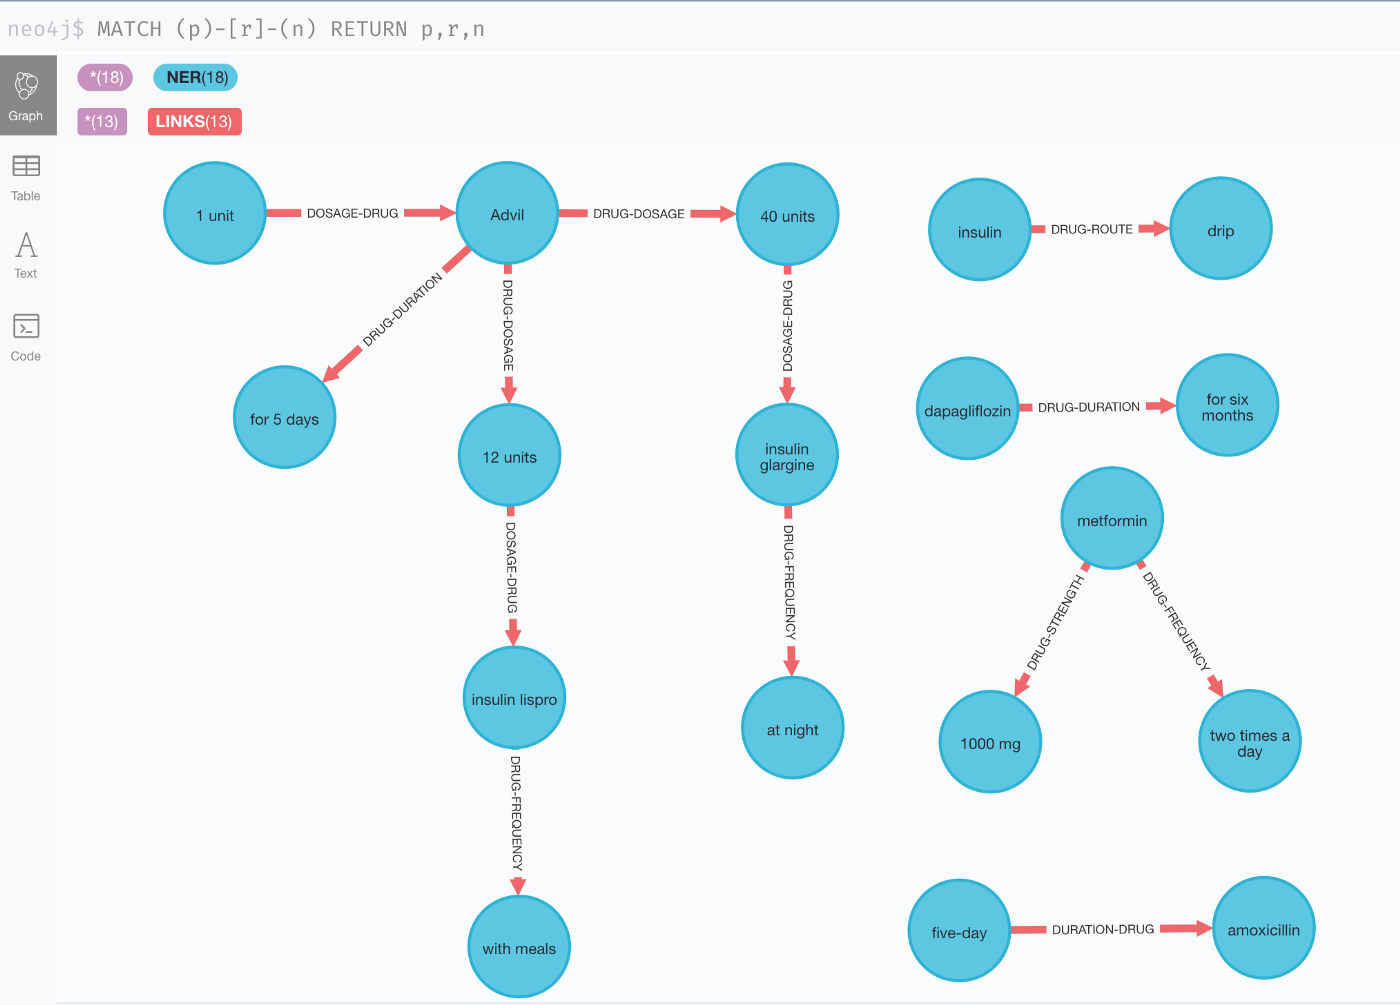

# Relation Extraction Model-NER Model-Relation Pairs Table

In the table below, you can find the Relationship Extraction models and the most appropriate NER models and Relationship Pairs that can be used to get the most efficient results when using these models.

Also, you can reach this table in [Sparknlp for Healthcare Documentation](https://nlp.johnsnowlabs.com/docs/en/best_practices_pretrained_models#relation-extraction-models-and-relation-pairs-table)

|    | RELATION EXTRACTION MODEL            | RELATION EXTRACTION MODEL LABELS                                        | NER MODEL                         | RELATION PAIRS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
|---:|:-------------------------------------|:------------------------------------------------------------------------|:----------------------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | re_bodypart_proceduretest            | 0-1                                                                     | ner_jsl                           | ["external_body_part_or_region-test", <br/> "test-external_body_part_or_region",<br/>"internal_organ_or_component-test",<br/>"test-internal_organ_or_component",<br/>"external_body_part_or_region-procedure",<br/>"procedure-external_body_part_or_region",<br/>"procedure-internal_organ_or_component",<br/>"internal_organ_or_component-procedure"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
|  1 | re_ade_clinical                      | 0-1                                                                     | ner_ade_clinical                  | ["ade-drug",<br/> "drug-ade"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
|  2 | redl_chemprot_biobert                | CPR:1, CPR:2, CPR:3, CPR:4, CPR:5, CPR:6, CPR:7, CPR:8, CPR:9, CPR:10   | ner_chemprot_clinical             |   No need to set pairs                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
|  3 | re_human_phenotype_gene_clinical     | 0-1                                                                     | ner_human_phenotype_gene_clinical |   No need to set pairs                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
|  4 | re_bodypart_directions               | 0-1                                                                     | ner_jsl                           | ["direction-external_body_part_or_region",<br/>"external_body_part_or_region-direction",<br/>"direction-internal_organ_or_component",<br/>"internal_organ_or_component-direction"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
|  5 | re_bodypart_problem                  | 0-1                                                                     | ner_jsl                           | ["internal_organ_or_component-cerebrovascular_disease", "cerebrovascular_disease-internal_organ_or_component",<br/>"internal_organ_or_component-communicable_disease", "communicable_disease-internal_organ_or_component",<br/>"internal_organ_or_component-diabetes", "diabetes-internal_organ_or_component",<br/>"internal_organ_or_component-disease_syndrome_disorder", "disease_syndrome_disorder-internal_organ_or_component",<br/>"internal_organ_or_component-ekg_findings", "ekg_findings-internal_organ_or_component",<br/>"internal_organ_or_component-heart_disease", "heart_disease-internal_organ_or_component",<br/>"internal_organ_or_component-hyperlipidemia", "hyperlipidemia-internal_organ_or_component",<br/>"internal_organ_or_component-hypertension", "hypertension-internal_organ_or_component",<br/>"internal_organ_or_component-imagingfindings", "imagingfindings-internal_organ_or_component",<br/>"internal_organ_or_component-injury_or_poisoning", "injury_or_poisoning-internal_organ_or_component",<br/>"internal_organ_or_component-kidney_disease", "kidney_disease-internal_organ_or_component",<br/>"internal_organ_or_component-oncological", "oncological-internal_organ_or_component",<br/>"internal_organ_or_component-psychological_condition", "psychological_condition-internal_organ_or_component",<br/>"internal_organ_or_component-symptom", "symptom-internal_organ_or_component",<br/>"internal_organ_or_component-vs_finding", "vs_finding-internal_organ_or_component",<br/>"external_body_part_or_region-communicable_disease", "communicable_disease-external_body_part_or_region",<br/>"external_body_part_or_region-diabetes", "diabetes-external_body_part_or_region",<br/>"external_body_part_or_region-disease_syndrome_disorder", "disease_syndrome_disorder-external_body_part_or_region",<br/>"external_body_part_or_region-hypertension", "hypertension-external_body_part_or_region",<br/>"external_body_part_or_region-imagingfindings", "imagingfindings-external_body_part_or_region",<br/>"external_body_part_or_region-injury_or_poisoning", "injury_or_poisoning-external_body_part_or_region",<br/>"external_body_part_or_region-obesity", "obesity-external_body_part_or_region",<br/>"external_body_part_or_region-oncological", "oncological-external_body_part_or_region",<br/>"external_body_part_or_region-overweight", "overweight-external_body_part_or_region",<br/>"external_body_part_or_region-symptom", "symptom-external_body_part_or_region",<br/>"external_body_part_or_region-vs_finding", "vs_finding-external_body_part_or_region"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
|  6 | re_drug_drug_interaction_clinical    | DDI-advise, DDI-effect, DDI-mechanism, DDI-int, DDI-false               | ner_posology                      | ["drug-drug"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
|  7 | re_clinical                          | TrIP, TrWP, TrCP, TrAP, TrAP, TeRP, TeCP, PIP                           | ner_clinical                      |   No need to set pairs                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
|  8 | re_temporal_events_clinical          | AFTER, BEFORE, OVERLAP                                                  | ner_events_clinical               |   No need to set pairs                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
|  9 | re_temporal_events_enriched_clinical | BEFORE, AFTER, SIMULTANEOUS, BEGUN_BY, ENDED_BY, DURING, BEFORE_OVERLAP | ner_events_clinical               |   No need to set pairs                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| 10 | re_test_problem_finding              | 0-1                                                                     | ner_jsl                           | ["test-cerebrovascular_disease", "cerebrovascular_disease-test",<br/>"test-communicable_disease", "communicable_disease-test",<br/>"test-diabetes", "diabetes-test",<br/>"test-disease_syndrome_disorder", "disease_syndrome_disorder-test",<br/>"test-heart_disease", "heart_disease-test",<br/>"test-hyperlipidemia", "hyperlipidemia-test",<br/>"test-hypertension", "hypertension-test",<br/>"test-injury_or_poisoning", "injury_or_poisoning-test",<br/>"test-kidney_disease", "kidney_disease-test",<br/>"test-obesity", "obesity-test",<br/>"test-oncological", "oncological-test",<br/>"test-psychological_condition", "psychological_condition-test",<br/>"test-symptom", "symptom-test",<br/>"ekg_findings-disease_syndrome_disorder", "disease_syndrome_disorder-ekg_findings",<br/>"ekg_findings-heart_disease", "heart_disease-ekg_findings",<br/>"ekg_findings-symptom", "symptom-ekg_findings",<br/>"imagingfindings-cerebrovascular_disease", "cerebrovascular_disease-imagingfindings",<br/>"imagingfindings-communicable_disease", "communicable_disease-imagingfindings",<br/>"imagingfindings-disease_syndrome_disorder", "disease_syndrome_disorder-imagingfindings",<br/>"imagingfindings-heart_disease", "heart_disease-imagingfindings",<br/>"imagingfindings-hyperlipidemia", "hyperlipidemia-imagingfindings",<br/>"imagingfindings-hypertension", "hypertension-imagingfindings",<br/>"imagingfindings-injury_or_poisoning", "injury_or_poisoning-imagingfindings",<br/>"imagingfindings-kidney_disease", "kidney_disease-imagingfindings",<br/>"imagingfindings-oncological", "oncological-imagingfindings",<br/>"imagingfindings-psychological_condition", "psychological_condition-imagingfindings",<br/>"imagingfindings-symptom", "symptom-imagingfindings",<br/>"vs_finding-cerebrovascular_disease", "cerebrovascular_disease-vs_finding",<br/>"vs_finding-communicable_disease", "communicable_disease-vs_finding",<br/>"vs_finding-diabetes", "diabetes-vs_finding",<br/>"vs_finding-disease_syndrome_disorder", "disease_syndrome_disorder-vs_finding",<br/>"vs_finding-heart_disease", "heart_disease-vs_finding",<br/>"vs_finding-hyperlipidemia", "hyperlipidemia-vs_finding",<br/>"vs_finding-hypertension", "hypertension-vs_finding",<br/>"vs_finding-injury_or_poisoning", "injury_or_poisoning-vs_finding",<br/>"vs_finding-kidney_disease", "kidney_disease-vs_finding",<br/>"vs_finding-obesity", "obesity-vs_finding",<br/>"vs_finding-oncological", "oncological-vs_finding",<br/>"vs_finding-overweight", "overweight-vs_finding",<br/>"vs_finding-psychological_condition", "psychological_condition-vs_finding",<br/>"vs_finding-symptom", "symptom-vs_finding"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| 11 | re_test_result_date                  | is_finding_of, is_result_of, is_date_of, O                              | ner_jsl                           | ['test-test_result', 'test_result-test', <br>'date-admission_discharge','admission_discharge-date', <br>'date-alcohol', 'alcohol-date', <br>'date-bmi', 'bmi-date', <br>'date-birth_entity', 'birth_entity-date', <br>'date-blood_pressure','blood_pressure-date', <br>'date-cerebrovascular_disease', 'cerebrovascular_disease-date', <br>'date-communicable_disease', 'communicable_disease-date',<br>'date-death_entity', 'death_entity-date', <br>'date-diabetes', 'diabetes-date', <br>'date-diet', 'diet-date', <br>'date-disease_syndrome_disorder', disease_syndrome_disorder-date', <br>'date-drug_brandname', 'drug_brandname-date', <br>'date-drug_ingredient', 'drug_ingredient-date', <br>'date-ekg_findings','ekg_findings-date', <br>'date-employment', 'employment-date', <br>'date-fetus_newborn', 'fetus_newborn-date', <br>'date-hdl', 'hdl-date', <br>'date-heart_disease', 'heart_disease-date', <br>'date-height', 'height-date', <br>'date-hyperlipidemia', 'hyperlipidemia-date', <br>'date-hypertension', 'hypertension-date',<br>'date-imagingfindings', 'imagingfindings-date', <br>'date-imaging_technique', 'imaging_technique-date', <br>'date-injury_or_poisoning', 'injury_or_poisoning-date',<br>'date-internal_organ_or_component', 'internal_organ_or_component-date', <br>'date-kidney_disease', 'kidney_disease-date', <br>'date-ldl', 'ldl-date',<br>'date-labour_delivery', 'labour_delivery-date', <br>'date-o2_saturation', 'o2_saturation-date', <br>'date-obesity', 'obesity-date', <br>'date-oncological', 'oncological-date', <br>'date-overweight', 'overweight-date', <br>'date-oxygen_therapy', 'oxygen_therapy-date', <br>'date-pregnancy', 'pregnancy-date',<br>'date-procedure', 'procedure-date', <br>'date-psychological_condition', 'psychological_condition-date', <br>'date-pulse', 'pulse-date',<br>'date-relationship_status', 'relationship_status-date', <br>'date-relativedate', 'relativedate-date', <br>'date-relativetime', 'relativetime-date', <br>'date-respiration', 'respiration-date', <br>'date-route', 'route-date', <br>'date-sexually_active_or_sexual_orientation','sexually_active_or_sexual_orientation-date', <br>'date-smoking', 'smoking-date', <br>'date-substance', 'substance-date', <br>'date-substance_quantity', substance_quantity-date', <br>'date-symptom', 'symptom-date', <br>'date-temperature', 'temperature-date', <br>'date-test', 'test-date', <br>'date-test_result', 'test_result-date', <br>'date-total_cholesterol', 'total_cholesterol-date', <br>'date-treatment', 'treatment-date', <br>'date-triglycerides', 'triglycerides-date',<br>'date-vs_finding', 'vs_finding-date', <br>'date-vaccine', 'vaccine-date', <br>'date-weight', 'weight-date', <br>'relativedate-admission_discharge','admission_discharge-relativedate', <br>'relativedate-alcohol', 'alcohol-relativedate', <br>'relativedate-bmi', 'bmi-relativedate', <br>'relativedate-birth_entity', 'birth_entity-relativedate', <br>'relativedate-blood_pressure', 'blood_pressure-relativedate', <br>'relativedate-cerebrovascular_disease', cerebrovascular_disease-relativedate', <br>'relativedate-communicable_disease', 'communicable_disease-relativedate', <br>'relativedate-death_entity', 'death_entity-relativedate', <br>'relativedate-diabetes', 'diabetes-relativedate', <br>'relativedate-diet', 'diet-relativedate', <br>'relativedate-disease_syndrome_disorder', 'disease_syndrome_disorder-relativedate', <br>'relativedate-drug_brandname', 'drug_brandname-relativedate',<br>'relativedate-drug_ingredient', 'drug_ingredient-relativedate', <br>'relativedate-ekg_findings', 'ekg_findings-relativedate', <br>'relativedate-employment', 'employment-relativedate', <br>'relativedate-fetus_newborn', 'fetus_newborn-relativedate', <br>'relativedate-hdl', 'hdl-relativedate', <br>'relativedate-heart_disease', 'heart_disease-relativedate', <br>'relativedate-height', 'height-relativedate', <br>'relativedate-hyperlipidemia', 'hyperlipidemia-relativedate',<br>'relativedate-hypertension', 'hypertension-relativedate', <br>'relativedate-imagingfindings', 'imagingfindings-relativedate', <br>'relativedate-imaging_technique', 'imaging_technique-relativedate', <br>'relativedate-injury_or_poisoning', 'injury_or_poisoning-relativedate', <br>'relativedate-internal_organ_or_component', internal_organ_or_component-relativedate', <br>'relativedate-kidney_disease', 'kidney_disease-relativedate', <br>'relativedate-ldl', 'ldl-relativedate',<br>'relativedate-labour_delivery', 'labour_delivery-relativedate', <br>'relativedate-o2_saturation', 'o2_saturation-relativedate', <br>'relativedate-obesity', 'obesity-relativedate', <br>'relativedate-oncological', 'oncological-relativedate', <br>'relativedate-overweight', 'overweight-relativedate',<br>'relativedate-oxygen_therapy', 'oxygen_therapy-relativedate', <br>'relativedate-pregnancy', 'pregnancy-relativedate', <br>'relativedate-procedure', 'procedure-relativedate', <br>'relativedate-psychological_condition', 'psychological_condition-relativedate', <br>'relativedate-pulse', 'pulse-relativedate',<br>'relativedate-relationship_status', 'relationship_status-relativedate', <br>'relativedate-relativedate', 'relativedate-relativetime',<br>'relativedate-relativetime', 'relativetime-relativedate', <br>'relativedate-respiration', 'respiration-relativedate', <br>'relativedate-route', 'route-relativedate',<br>'relativedate-sexually_active_or_sexual_orientation', 'sexually_active_or_sexual_orientation-relativedate', <br>'relativedate-smoking', 'smoking-relativedate',<br>'relativedate-substance', 'substance-relativedate', <br>'relativedate-substance_quantity', 'substance_quantity-relativedate', <br>'relativedate-symptom', symptom-relativedate', <br>'relativedate-temperature', 'temperature-relativedate', <br>'relativedate-test', 'test-relativedate', <br>'relativedate-test_result', 'test_result-relativedate', <br>'relativedate-total_cholesterol', 'total_cholesterol-relativedate', <br>'relativedate-treatment', 'treatment-relativedate',<br>'relativedate-triglycerides', 'triglycerides-relativedate', <br>'relativedate-vs_finding', 'vs_finding-relativedate', <br>'relativedate-vaccine','vaccine-relativedate', <br>'relativedate-weight', 'weight-relativedate', <br>'test-cerebrovascular_disease', 'cerebrovascular_disease-test', <br>'test-communicable_disease', 'communicable_disease-test', <br>'test-diabetes', 'diabetes-test', <br>'test-disease_syndrome_disorder', disease_syndrome_disorder-test', <br>'test-ekg_findings', 'ekg_findings-test', <br>'test-heart_disease', 'heart_disease-test', <br>'test-hyperlipidemia','hyperlipidemia-test', <br>'test-hypertension', 'hypertension-test', <br>'test-imagingfindings', 'imagingfindings-test', <br>'test-injury_or_poisoning', 'injury_or_poisoning-test', <br>'test-kidney_disease', 'kidney_disease-test', <br>'test-oncological', 'oncological-test', <br>'test-vs_finding', 'vs_finding-test',<br>'weight-overweight', 'overweight-weight', <br>'weight-obesity', 'obesity-weight', <br>'bmi-obesity', 'obesity-bmi', <br>'bmi-overweight', 'overweight-bmi',<br>'ekg_findings-heart_disease', 'heart_disease-ekg_findings', <br>'imaging_technique-imagingfindings', 'imagingfindings-imaging_technique']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| 12 | re_date_clinical                     | 0-1                                                                     | ner_jsl                           | ["date-admission_discharge", "admission_discharge-date",<br/>"date-alcohol", "alcohol-date",<br/>"date-allergen", "allergen-date",<br/>"date-bmi", "bmi-date",<br/>"date-birth_entity", "birth_entity-date",<br/>"date-blood_pressure", "blood_pressure-date",<br/>"date-cerebrovascular_disease", "cerebrovascular_disease-date",<br/>"date-clinical_dept", "clinical_dept-date",<br/>"date-communicable_disease", "communicable_disease-date",<br/>"date-death_entity", "death_entity-date",<br/>"date-diabetes", "diabetes-date",<br/>"date-diet", "diet-date",<br/>"date-disease_syndrome_disorder", "disease_syndrome_disorder-date",<br/>"date-drug_brandname", "drug_brandname-date",<br/>"date-drug_ingredient", "drug_ingredient-date",<br/>"date-ekg_findings", "ekg_findings-date",<br/>"date-external_body_part_or_region", "external_body_part_or_region-date",<br/>"date-fetus_newborn", "fetus_newborn-date",<br/>"date-hdl", "hdl-date",<br/>"date-heart_disease", "heart_disease-date",<br/>"date-height", "height-date",<br/>"date-hyperlipidemia", "hyperlipidemia-date",<br/>"date-hypertension", "hypertension-date",<br/>"date-imagingfindings", "imagingfindings-date",<br/>"date-imaging_technique", "imaging_technique-date",<br/>"date-injury_or_poisoning", "injury_or_poisoning-date",<br/>"date-internal_organ_or_component", "internal_organ_or_component-date",<br/>"date-kidney_disease", "kidney_disease-date",<br/>"date-ldl", "ldl-date",<br/>"date-modifier", "modifier-date",<br/>"date-o2_saturation", "o2_saturation-date",<br/>"date-obesity", "obesity-date",<br/>"date-oncological", "oncological-date",<br/>"date-overweight", "overweight-date",<br/>"date-oxygen_therapy", "oxygen_therapy-date",<br/>"date-pregnancy", "pregnancy-date",<br/>"date-procedure", "procedure-date",<br/>"date-psychological_condition", "psychological_condition-date",<br/>"date-pulse", "pulse-date",<br/>"date-respiration", "respiration-date",<br/>"date-smoking", "smoking-date",<br/>"date-substance", "substance-date",<br/>"date-substance_quantity", "substance_quantity-date",<br/>"date-symptom", "symptom-date",<br/>"date-temperature", "temperature-date",<br/>"date-test", "test-date",<br/>"date-test_result", "test_result-date",<br/>"date-total_cholesterol", "total_cholesterol-date",<br/>"date-treatment", "treatment-date",<br/>"date-triglycerides", "triglycerides-date",<br/>"date-vs_finding", "vs_finding-date",<br/>"date-vaccine", "vaccine-date",<br/>"date-vital_signs_header", "vital_signs_header-date",<br/>"date-weight", "weight-date",<br/>"time-admission_discharge", "admission_discharge-time",<br/>"time-alcohol", "alcohol-time",<br/>"time-allergen", "allergen-time",<br/>"time-bmi", "bmi-time",<br/>"time-birth_entity", "birth_entity-time",<br/>"time-blood_pressure", "blood_pressure-time",<br/>"time-cerebrovascular_disease", "cerebrovascular_disease-time",<br/>"time-clinical_dept", "clinical_dept-time",<br/>"time-communicable_disease", "communicable_disease-time",<br/>"time-death_entity", "death_entity-time",<br/>"time-diabetes", "diabetes-time",<br/>"time-diet", "diet-time",<br/>"time-disease_syndrome_disorder", "disease_syndrome_disorder-time",<br/>"time-drug_brandname", "drug_brandname-time",<br/>"time-drug_ingredient", "drug_ingredient-time",<br/>"time-ekg_findings", "ekg_findings-time",<br/>"time-external_body_part_or_region", "external_body_part_or_region-time",<br/>"time-fetus_newborn", "fetus_newborn-time",<br/>"time-hdl", "hdl-time",<br/>"time-heart_disease", "heart_disease-time",<br/>"time-height", "height-time",<br/>"time-hyperlipidemia", "hyperlipidemia-time",<br/>"time-hypertension", "hypertension-time",<br/>"time-imagingfindings", "imagingfindings-time",<br/>"time-imaging_technique", "imaging_technique-time",<br/>"time-injury_or_poisoning", "injury_or_poisoning-time",<br/>"time-internal_organ_or_component", "internal_organ_or_component-time",<br/>"time-kidney_disease", "kidney_disease-time",<br/>"time-ldl", "ldl-time",<br/>"time-modifier", "modifier-time",<br/>"time-o2_saturation", "o2_saturation-time",<br/>"time-obesity", "obesity-time",<br/>"time-oncological", "oncological-time",<br/>"time-overweight", "overweight-time",<br/>"time-oxygen_therapy", "oxygen_therapy-time",<br/>"time-pregnancy", "pregnancy-time",<br/>"time-procedure", "procedure-time",<br/>"time-psychological_condition", "psychological_condition-time",<br/>"time-pulse", "pulse-time",<br/>"time-respiration", "respiration-time",<br/>"time-smoking", "smoking-time",<br/>"time-substance", "substance-time",<br/>"time-substance_quantity", "substance_quantity-time",<br/>"time-symptom", "symptom-time",<br/>"time-temperature", "temperature-time",<br/>"time-test", "test-time",<br/>"time-test_result", "test_result-time",<br/>"time-total_cholesterol", "total_cholesterol-time",<br/>"time-treatment", "treatment-time",<br/>"time-triglycerides", "triglycerides-time",<br/>"time-vs_finding", "vs_finding-time",<br/>"time-vaccine", "vaccine-time",<br/>"time-vital_signs_header", "vital_signs_header-time",<br/>"time-weight", "weight-time",<br/>"relativedate-admission_discharge", "admission_discharge-relativedate",<br/>"relativedate-alcohol", "alcohol-relativedate",<br/>"relativedate-allergen", "allergen-relativedate",<br/>"relativedate-bmi", "bmi-relativedate",<br/>"relativedate-birth_entity", "birth_entity-relativedate",<br/>"relativedate-blood_pressure", "blood_pressure-relativedate",<br/>"relativedate-cerebrovascular_disease", "cerebrovascular_disease-relativedate",<br/>"relativedate-clinical_dept", "clinical_dept-relativedate",<br/>"relativedate-communicable_disease", "communicable_disease-relativedate",<br/>"relativedate-death_entity", "death_entity-relativedate",<br/>"relativedate-diabetes", "diabetes-relativedate",<br/>"relativedate-diet", "diet-relativedate",<br/>"relativedate-disease_syndrome_disorder", "disease_syndrome_disorder-relativedate",<br/>"relativedate-drug_brandname", "drug_brandname-relativedate",<br/>"relativedate-drug_ingredient", "drug_ingredient-relativedate",<br/>"relativedate-ekg_findings", "ekg_findings-relativedate",<br/>"relativedate-external_body_part_or_region", "external_body_part_or_region-relativedate",<br/>"relativedate-fetus_newborn", "fetus_newborn-relativedate",<br/>"relativedate-hdl", "hdl-relativedate",<br/>"relativedate-heart_disease", "heart_disease-relativedate",<br/>"relativedate-height", "height-relativedate",<br/>"relativedate-hyperlipidemia", "hyperlipidemia-relativedate",<br/>"relativedate-hypertension", "hypertension-relativedate",<br/>"relativedate-imagingfindings", "imagingfindings-relativedate",<br/>"relativedate-imaging_technique", "imaging_technique-relativedate",<br/>"relativedate-injury_or_poisoning", "injury_or_poisoning-relativedate",<br/>"relativedate-internal_organ_or_component", "internal_organ_or_component-relativedate",<br/>"relativedate-kidney_disease", "kidney_disease-relativedate",<br/>"relativedate-ldl", "ldl-relativedate",<br/>"relativedate-modifier", "modifier-relativedate",<br/>"relativedate-o2_saturation", "o2_saturation-relativedate",<br/>"relativedate-obesity", "obesity-relativedate",<br/>"relativedate-oncological", "oncological-relativedate",<br/>"relativedate-overweight", "overweight-relativedate",<br/>"relativedate-oxygen_therapy", "oxygen_therapy-relativedate",<br/>"relativedate-pregnancy", "pregnancy-relativedate",<br/>"relativedate-procedure", "procedure-relativedate",<br/>"relativedate-psychological_condition", "psychological_condition-relativedate",<br/>"relativedate-pulse", "pulse-relativedate",<br/>"relativedate-respiration", "respiration-relativedate",<br/>"relativedate-smoking", "smoking-relativedate",<br/>"relativedate-substance", "substance-relativedate",<br/>"relativedate-substance_quantity", "substance_quantity-relativedate",<br/>"relativedate-symptom", "symptom-relativedate",<br/>"relativedate-temperature", "temperature-relativedate",<br/>"relativedate-test", "test-relativedate",<br/>"relativedate-test_result", "test_result-relativedate",<br/>"relativedate-total_cholesterol", "total_cholesterol-relativedate",<br/>"relativedate-treatment", "treatment-relativedate",<br/>"relativedate-triglycerides", "triglycerides-relativedate",<br/>"relativedate-vs_finding", "vs_finding-relativedate",<br/>"relativedate-vaccine", "vaccine-relativedate",<br/>"relativedate-vital_signs_header", "vital_signs_header-relativedate",<br/>"relativedate-weight", "weight-relativedate",<br/>"relativetime-admission_discharge", "admission_discharge-relativetime",<br/>"relativetime-alcohol", "alcohol-relativetime",<br/>"relativetime-allergen", "allergen-relativetime",<br/>"relativetime-bmi", "bmi-relativetime",<br/>"relativetime-birth_entity", "birth_entity-relativetime",<br/>"relativetime-blood_pressure", "blood_pressure-relativetime",<br/>"relativetime-cerebrovascular_disease", "cerebrovascular_disease-relativetime",<br/>"relativetime-clinical_dept", "clinical_dept-relativetime",<br/>"relativetime-communicable_disease", "communicable_disease-relativetime",<br/>"relativetime-death_entity", "death_entity-relativetime",<br/>"relativetime-diabetes", "diabetes-relativetime",<br/>"relativetime-diet", "diet-relativetime",<br/>"relativetime-disease_syndrome_disorder", "disease_syndrome_disorder-relativetime",<br/>"relativetime-drug_brandname", "drug_brandname-relativetime",<br/>"relativetime-drug_ingredient", "drug_ingredient-relativetime",<br/>"relativetime-ekg_findings", "ekg_findings-relativetime",<br/>"relativetime-external_body_part_or_region", "external_body_part_or_region-relativetime",<br/>"relativetime-fetus_newborn", "fetus_newborn-relativetime",<br/>"relativetime-hdl", "hdl-relativetime",<br/>"relativetime-heart_disease", "heart_disease-relativetime",<br/>"relativetime-height", "height-relativetime",<br/>"relativetime-hyperlipidemia", "hyperlipidemia-relativetime",<br/>"relativetime-hypertension", "hypertension-relativetime",<br/>"relativetime-imagingfindings", "imagingfindings-relativetime",<br/>"relativetime-imaging_technique", "imaging_technique-relativetime",<br/>"relativetime-injury_or_poisoning", "injury_or_poisoning-relativetime",<br/>"relativetime-internal_organ_or_component", "internal_organ_or_component-relativetime",<br/>"relativetime-kidney_disease", "kidney_disease-relativetime",<br/>"relativetime-ldl", "ldl-relativetime",<br/>"relativetime-modifier", "modifier-relativetime",<br/>"relativetime-o2_saturation", "o2_saturation-relativetime",<br/>"relativetime-obesity", "obesity-relativetime",<br/>"relativetime-oncological", "oncological-relativetime",<br/>"relativetime-overweight", "overweight-relativetime",<br/>"relativetime-oxygen_therapy", "oxygen_therapy-relativetime",<br/>"relativetime-pregnancy", "pregnancy-relativetime",<br/>"relativetime-procedure", "procedure-relativetime",<br/>"relativetime-psychological_condition", "psychological_condition-relativetime",<br/>"relativetime-pulse", "pulse-relativetime",<br/>"relativetime-respiration", "respiration-relativetime",<br/>"relativetime-smoking", "smoking-relativetime",<br/>"relativetime-substance", "substance-relativetime",<br/>"relativetime-substance_quantity", "substance_quantity-relativetime",<br/>"relativetime-symptom", "symptom-relativetime",<br/>"relativetime-temperature", "temperature-relativetime",<br/>"relativetime-test", "test-relativetime",<br/>"relativetime-test_result", "test_result-relativetime",<br/>"relativetime-total_cholesterol", "total_cholesterol-relativetime",<br/>"relativetime-treatment", "treatment-relativetime",<br/>"relativetime-triglycerides", "triglycerides-relativetime",<br/>"relativetime-vs_finding", "vs_finding-relativetime",<br/>"relativetime-vaccine", "vaccine-relativetime",<br/>"relativetime-vital_signs_header", "vital_signs_header-relativetime",<br/>"relativetime-weight", "weight-relativetime"] |

## Extra Informations

**ExceptionHandling**

A robust exception handling if the process is broken down due to corrupted inputs. If it is set as True, the annotator tries to process as usual and ff exception-causing data (e.g. corrupted record/ document) is passed to the annotator, an exception warning is emitted which has the exception message. Processing continues with the next one while the rest of the records within the same batch is parsed without interruption. This comes with a performance penalty. The default behaviour is False and will throw exception and break the process to inform users.


*Example*:
```python
    reModel = medical.RelationExtractionModel()\
        .pretrained("posology_re")\
        .setInputCols(["embeddings", "pos_tags", "ner_chunk", "dependencies"])\
        .setOutputCol("relations")\
        .setMaxSyntacticDistance(4)\
        .setDoExceptionHandling(True)

    ade_re_model = medical.RelationExtractionDLModel().pretrained('redl_ade_biobert', 'en', "clinical/models") \
        .setPredictionThreshold(0.5)\
        .setInputCols(["re_ner_chunks", "sentence"]) \
        .setOutputCol("relations")\  
        .setDoExceptionHandling(True     
```